In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy
import matplotlib.colors as mcolors
import networkx as nx
import pickle

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')
    os.chdir('..')
    os.chdir('..')
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.fhn import FHNModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_fhn
from neurolib.optimal_control.oc_utils.plot_oc import plot_oc_nw

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

options = {
    'node_color': 'lightgray',
    'node_size': 1000,
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 20,
    'font_size' : 20,
    'font_weight' : 'bold',
    }

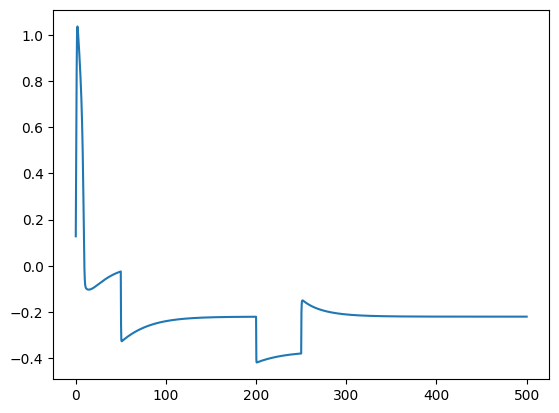

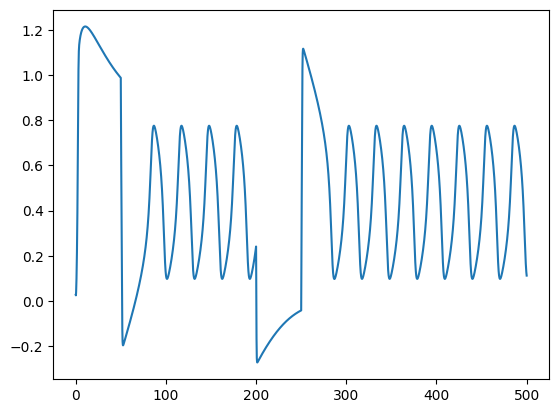

period =  33.47142857142857


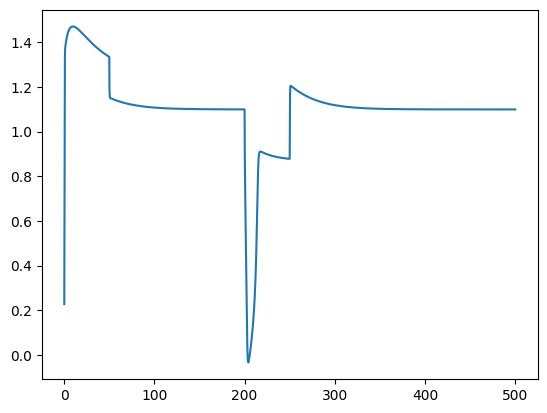

In [5]:
comp_points = [[-1., 0.], [1., 0.], [3., 0.]]

N = 1
dir = "images_1n"

colors = []
n = 0
for col in mcolors.TABLEAU_COLORS:
    colors.append(col)
    n += 1
    if n >= N: break

model = FHNModel()

dt = 0.1
model.params['dt'] = dt # Integration time step, ms
model.params['duration'] = 1. * 500 # Simulation time, ms
model.params.signalV = 1.

zero_input = ZeroInput().generate_input(duration=model.params['duration']+model.params.dt, dt=model.params.dt)
rect_input = np.vstack( (zero_input)*2 )
rect_input[0,:500] = 1.
rect_input[0,2000:2500] = -1.
model.params["x_ext"] = rect_input[0,:]

for p in comp_points:
    model.params["x_ou_mean"] = p[0]
    model.params["y_ou_mean"] = p[1]
    model.run()

    for n in range(N):
        plt.plot(model.t, model.x[n,:], color=colors[n])
    plt.show()

    if p[0] == 1.:

        peaks = scipy.signal.find_peaks(model.x[0,2000:5000])[0]
        plist = []
        for pind in range(1, len(peaks)):
            plist.append(model.params.dt * (peaks[pind]-peaks[pind-1]))

        period = np.mean(plist)
        print("period = ", period)


In [6]:
def getperiods(x, prominence):
    timing_list = [None] * N
    periods_list = [None] * N

    for n in range(N):
        timing_list[n] = scipy.signal.find_peaks(x[n, 0, 300:], prominence=prominence)[0]
        periods_list[n] = []
        if len(timing_list[n]) < 3:
            continue
        for pind in range(1, len(timing_list[n])):
            periods_list[n].append(model.params.dt * (timing_list[n][pind]-timing_list[n][pind-1]))

    return timing_list, periods_list

In [48]:
controlmat = np.zeros((N,2))
controlmat[:,0] = 1.

costmat = np.zeros((N, 2))
costmat[:,0] = 1.

duration = 400.
model.params.duration = duration
zero_input0 = ZeroInput().generate_input(duration=duration+model.params.dt, dt=model.params.dt)
zero_input = np.vstack( ([zero_input0]*2) )[np.newaxis,:,:]
zero_control = np.vstack( ([zero_input]*N))

print(zero_input0.shape, zero_input.shape, zero_control.shape)

w2_array = [1e1, 1e-1, 1e-3]

results = dict()
results["controls"] = [ [ [None, None, None], [None, None, None], [None, None, None], [None, None, None], [None, None, None] ],
                        [ [None, None, None], [None, None, None], [None, None, None], [None, None, None], [None, None, None] ],
                        [ [None, None, None], [None, None, None], [None, None, None], [None, None, None], [None, None, None] ],
]

target_array = [0.5*period, 0.9*period, period, 1.1*period, 1.6*period]
results["periods"] = [ [ [None, None, None], [None, None, None], [None, None, None], [None, None, None], [None, None, None] ],
                        [ [None, None, None], [None, None, None], [None, None, None], [None, None, None], [None, None, None] ],
                        [ [None, None, None], [None, None, None], [None, None, None], [None, None, None], [None, None, None] ],
]
results["timings"] =  [ [ [None, None, None], [None, None, None], [None, None, None], [None, None, None], [None, None, None] ],
                        [ [None, None, None], [None, None, None], [None, None, None], [None, None, None], [None, None, None] ],
                        [ [None, None, None], [None, None, None], [None, None, None], [None, None, None], [None, None, None] ],
]

(1, 4001) (1, 2, 4001) (1, 2, 4001)


In [102]:
it = 50
pr = np.arange(0,101,10)
maxstr = 2.
nmaxdel = model.getMaxDelay()
proms = [1e-3, 1e-3, 1e-1]

init_control = zero_control.copy()

pind =  0
itar =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0005525889764553803
Final cost : -0.0005525889764553803


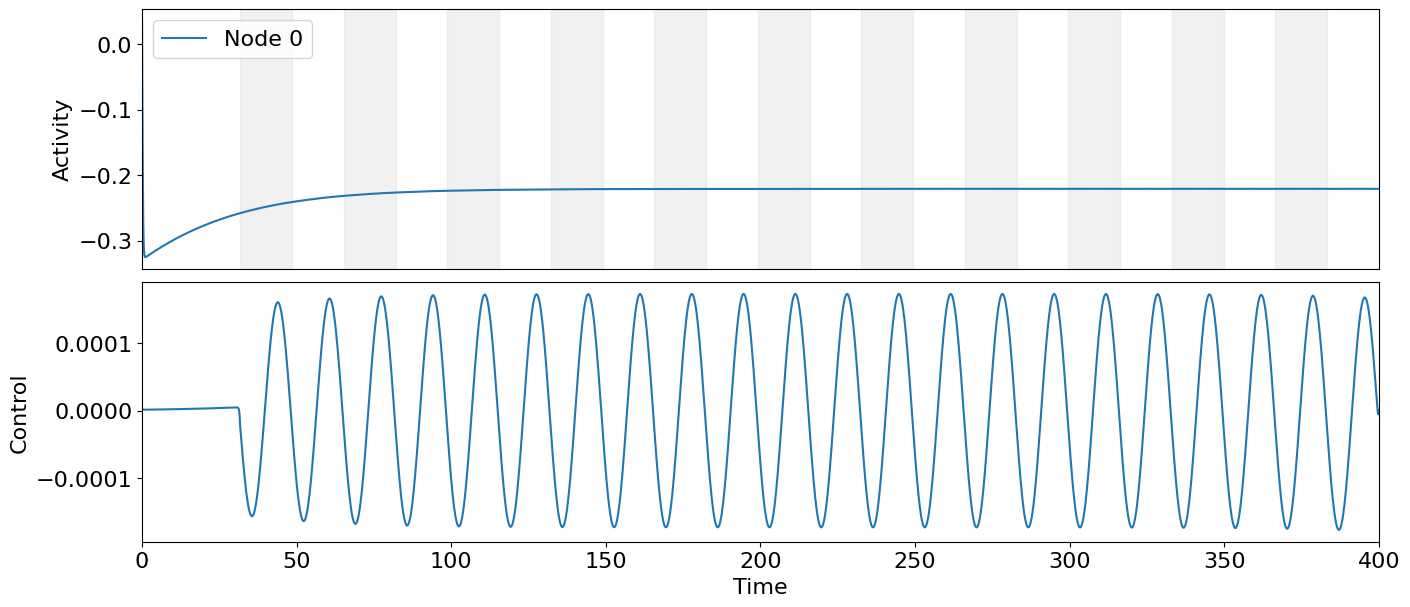

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0024705441897247098
Final cost : -0.0024705441897247098


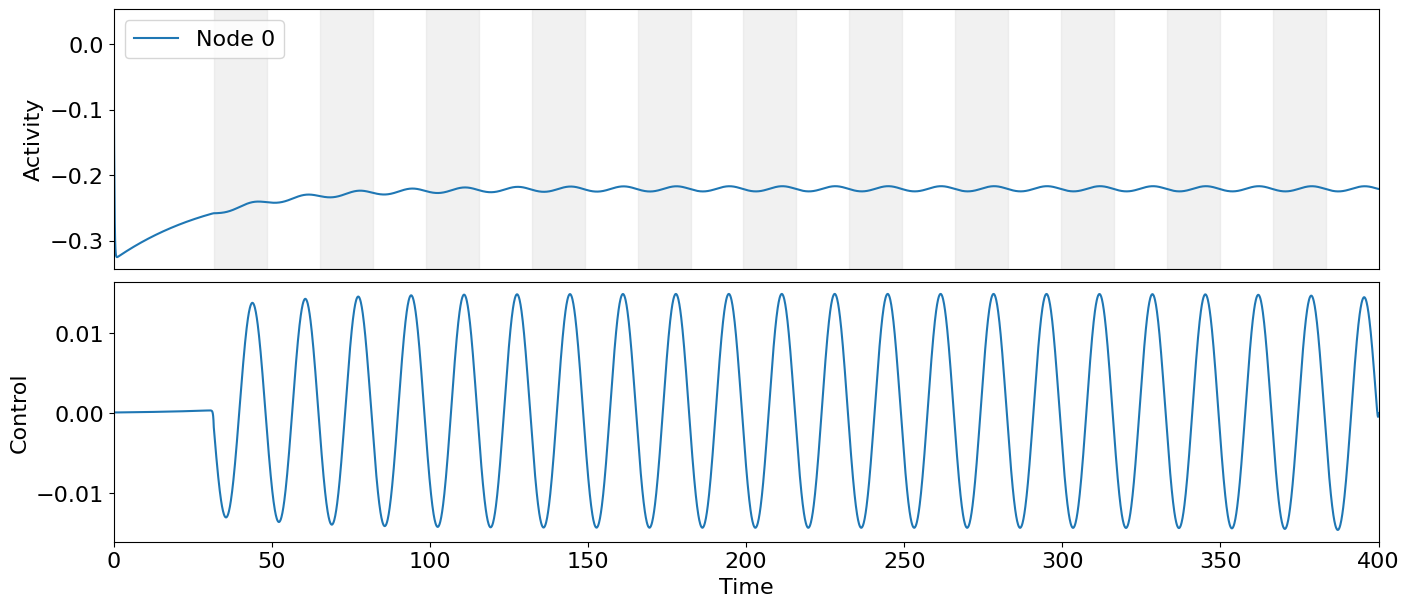

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.6131268358057207
Final cost : -0.6131268358057207


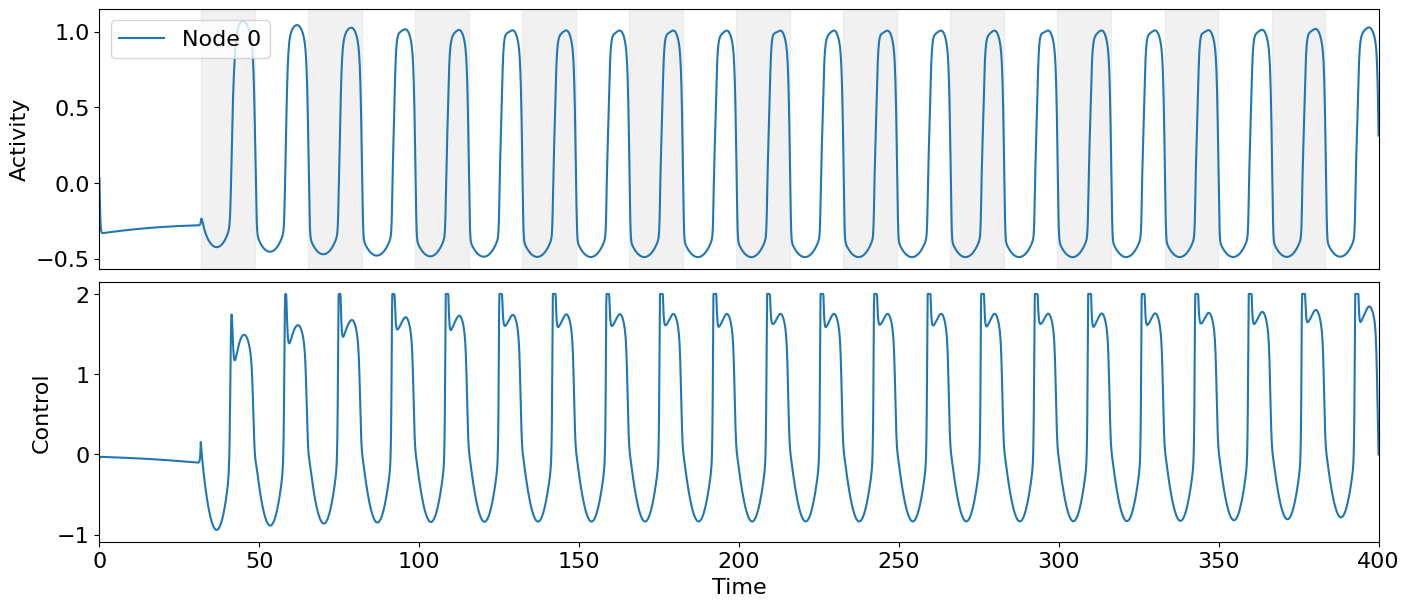

itar =  1
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0020273732931628263
Final cost : -0.0020273732931628263


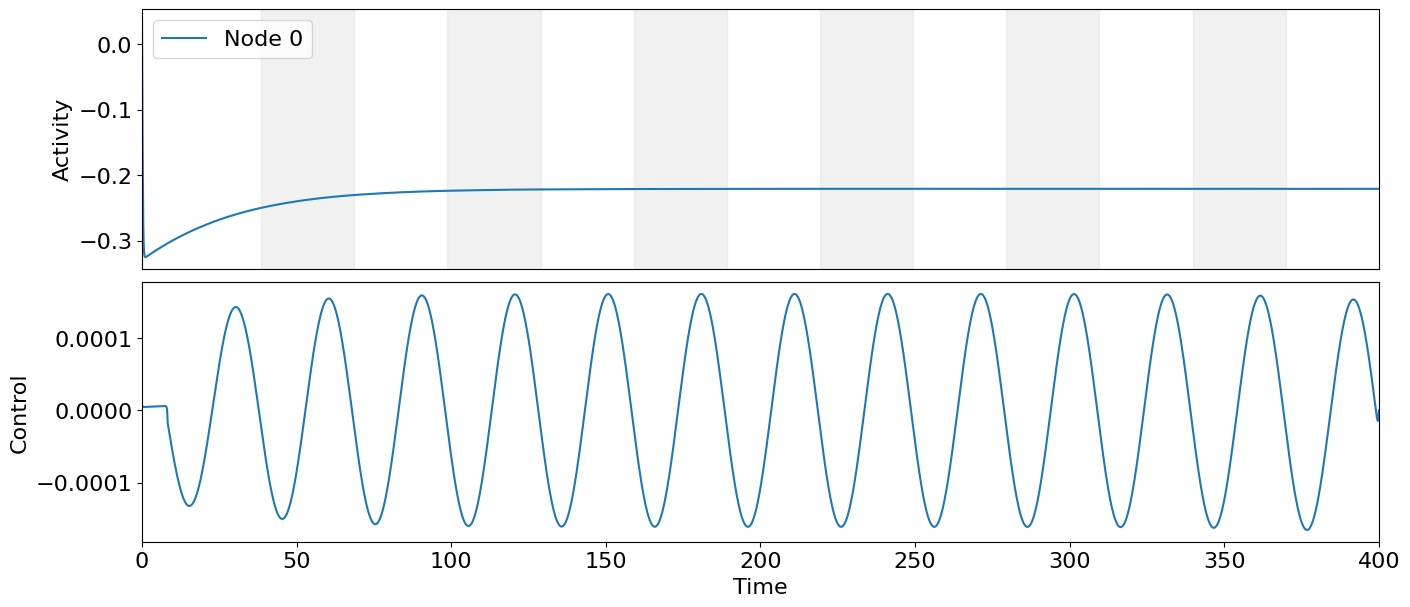

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.00378137509894402
Final cost : -0.00378137509894402


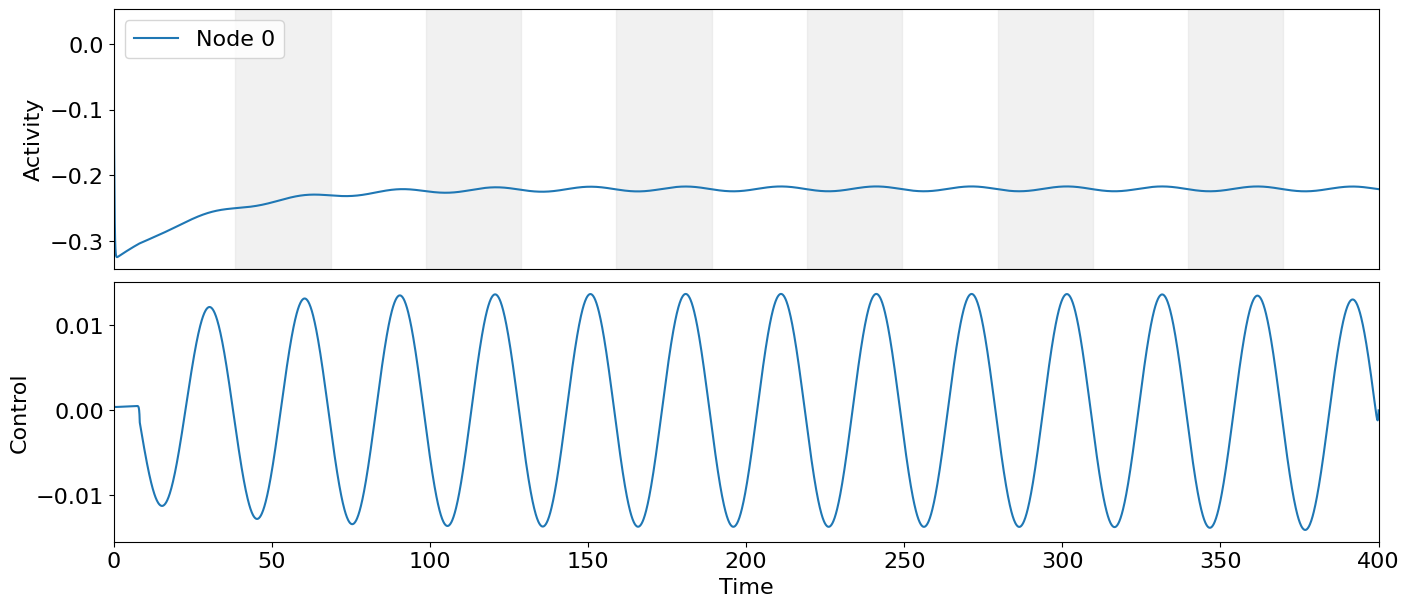

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.6077999164937815
Final cost : -0.6077999164937815


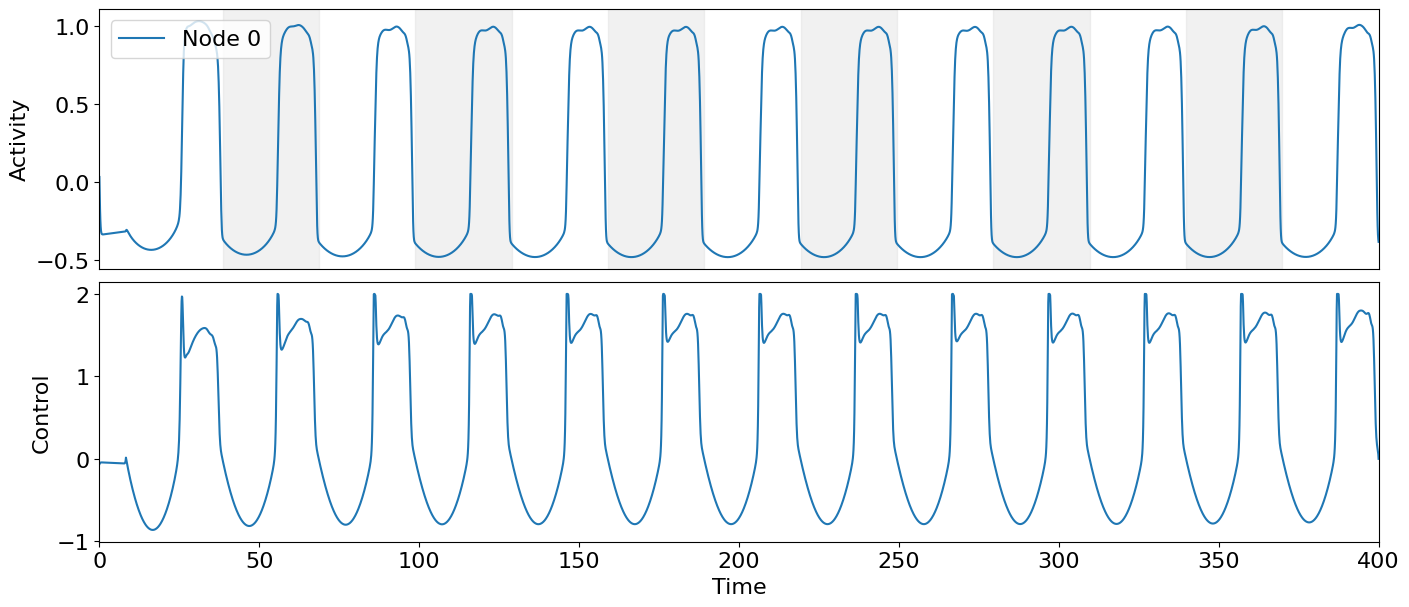

itar =  2
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0010736285846266566
Final cost : -0.0010736285846266566


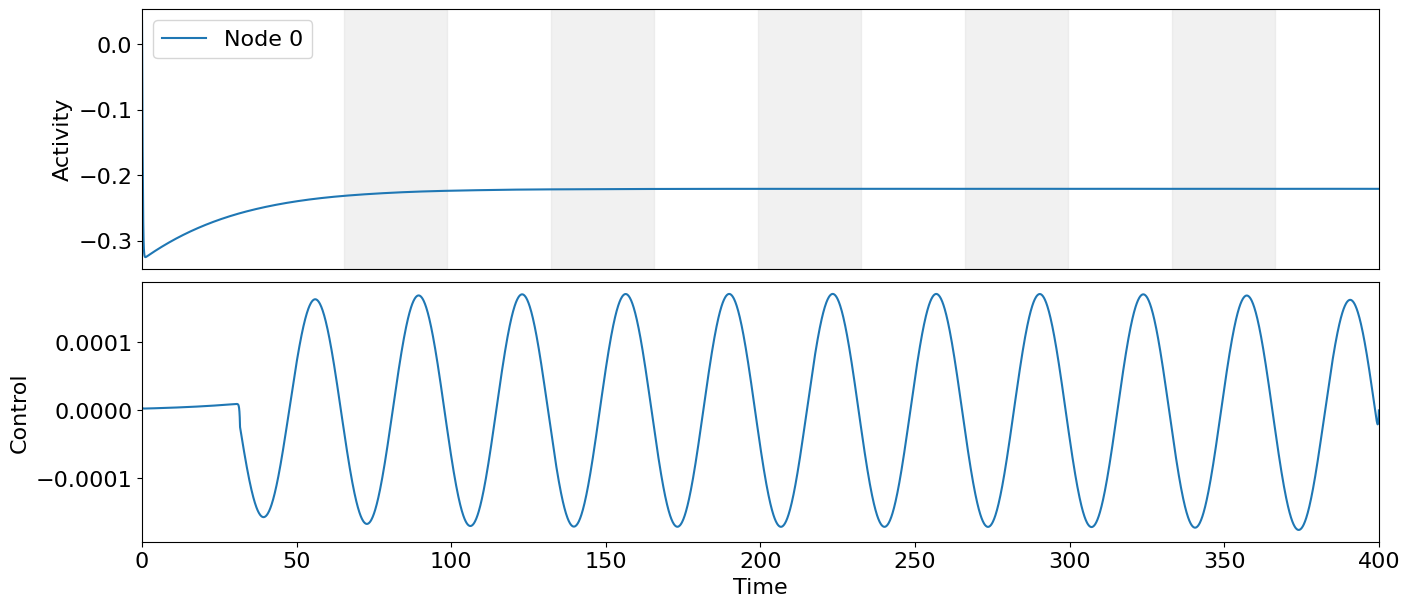

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.002962182159458584
Final cost : -0.002962182159458584


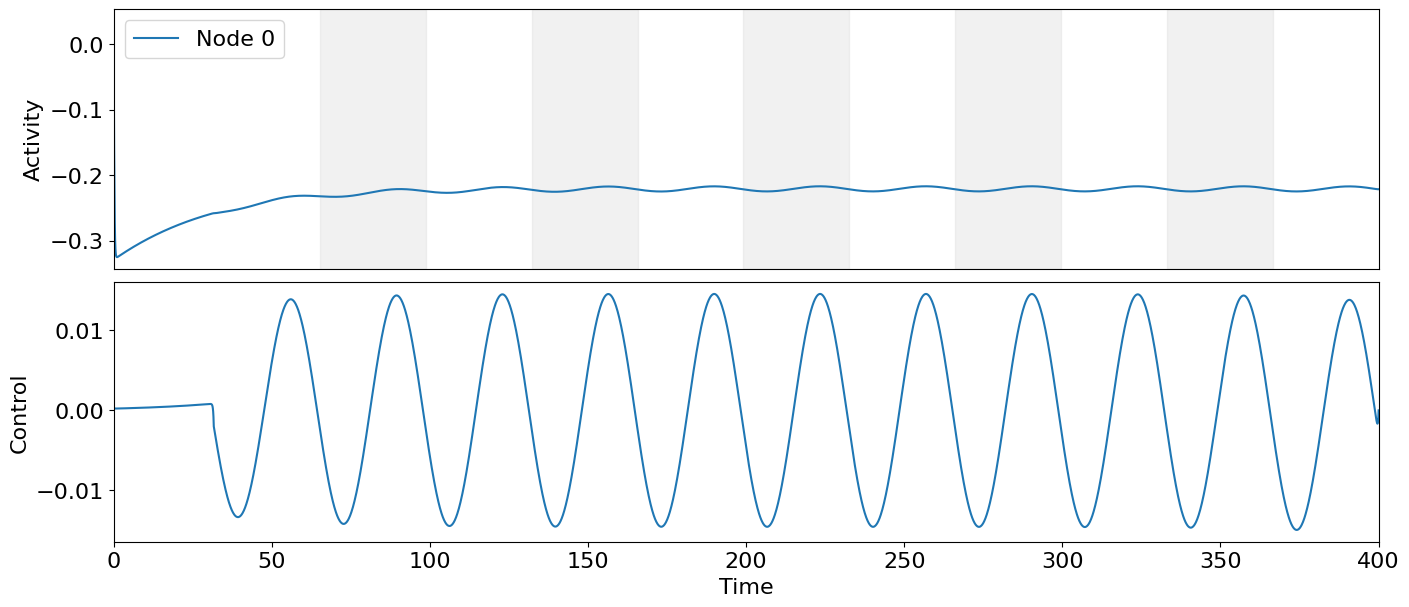

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.6235952577739526
Final cost : -0.6235952577739526


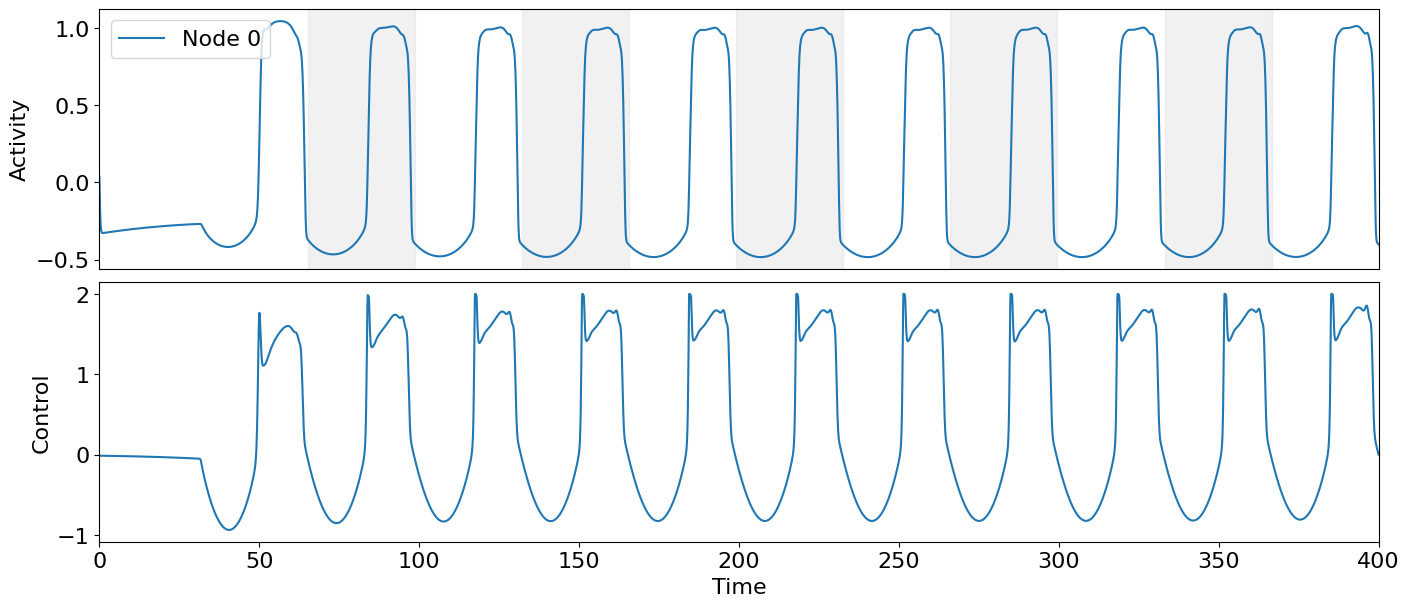

itar =  3
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0011752044896798965
Final cost : -0.0011752044896798965


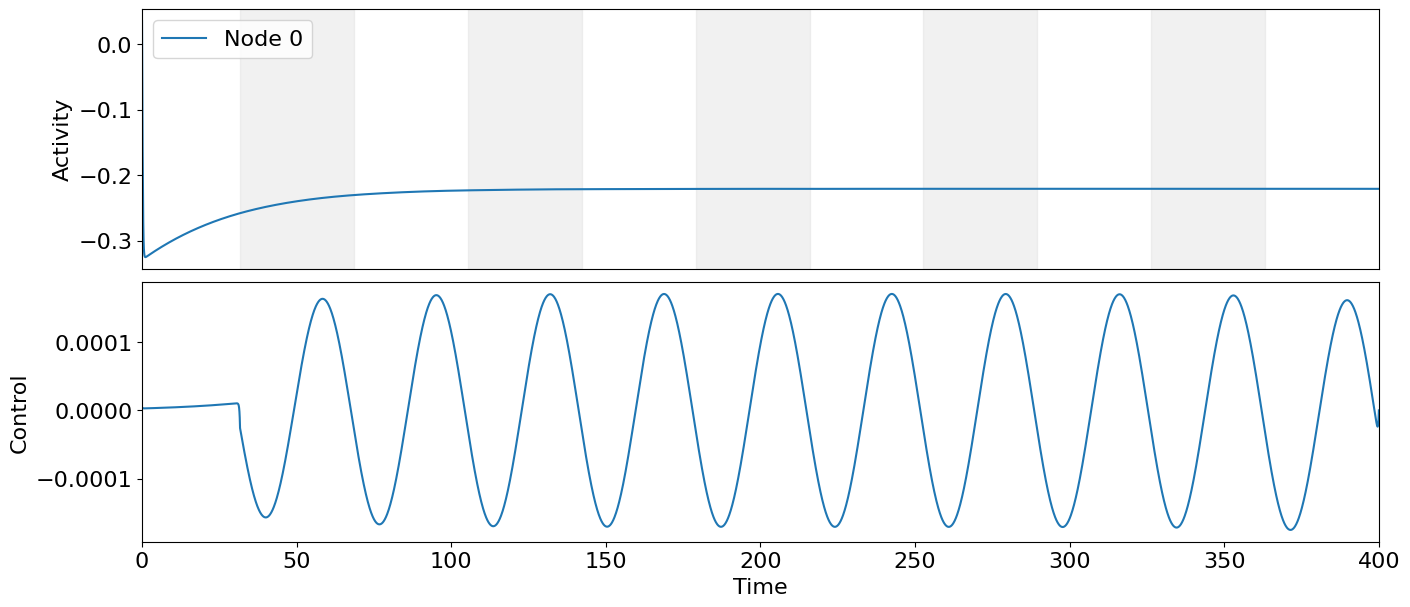

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.003053972304046896
Final cost : -0.003053972304046896


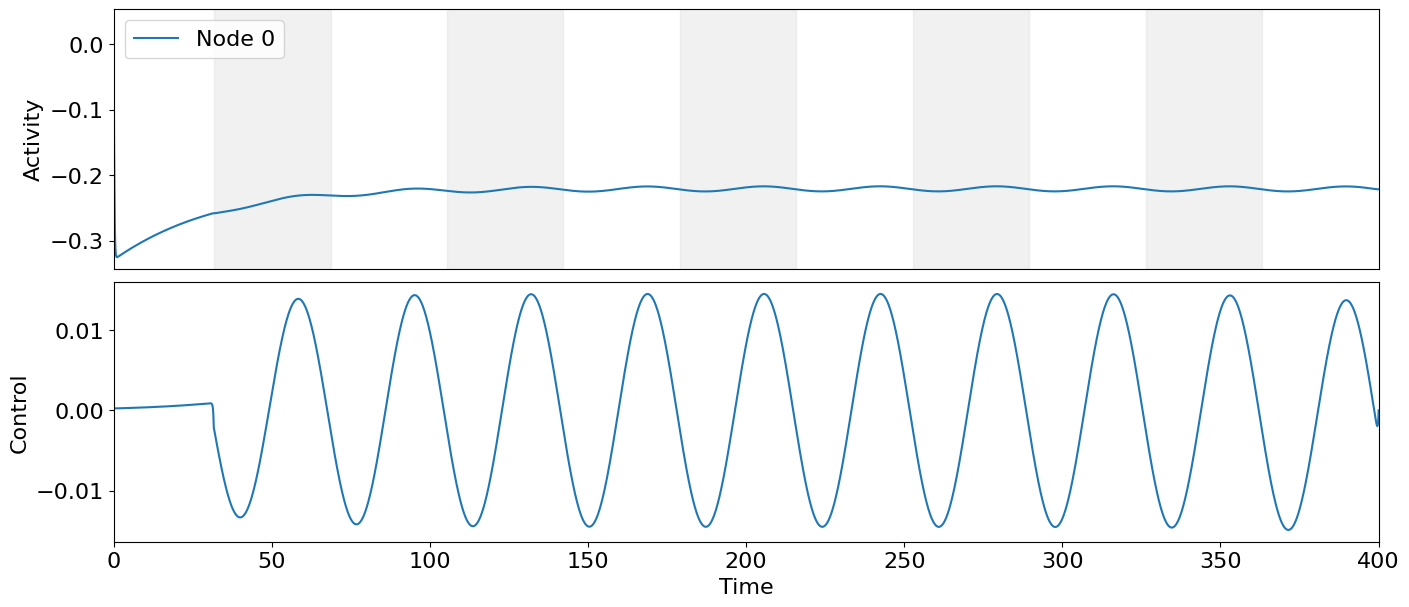

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.6216578683218773
Final cost : -0.6216578683218773


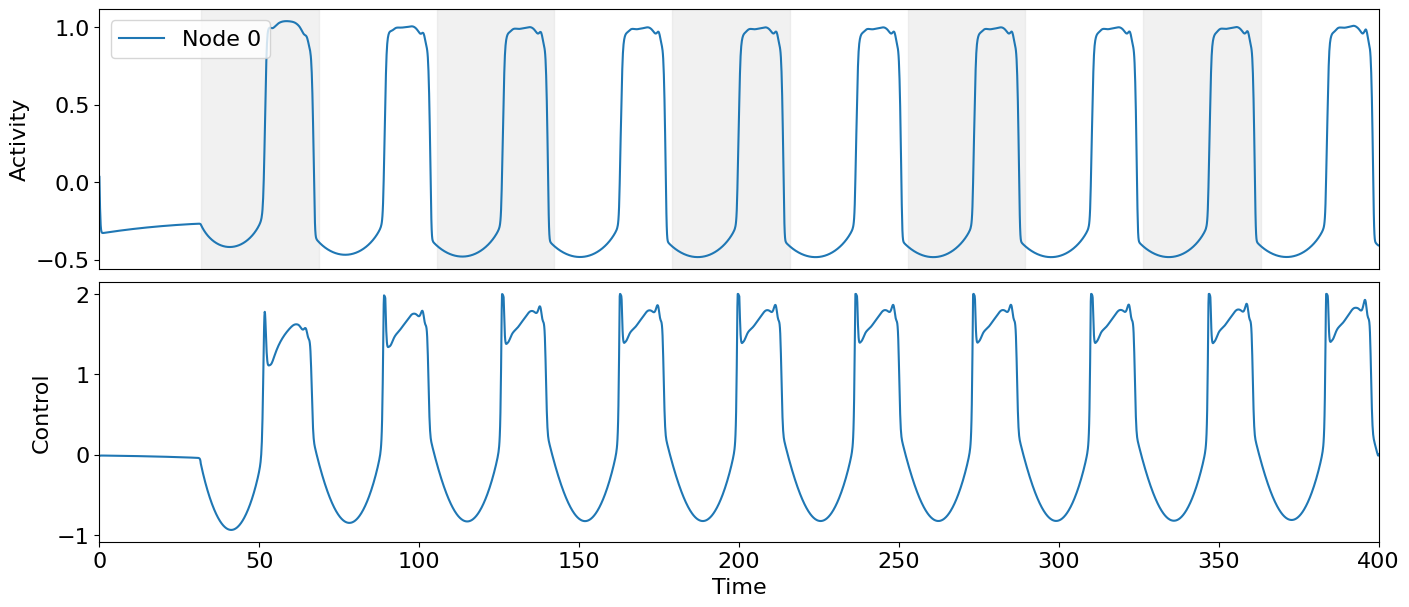

itar =  4
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0020736939245381753
Final cost : -0.0020736939245381753


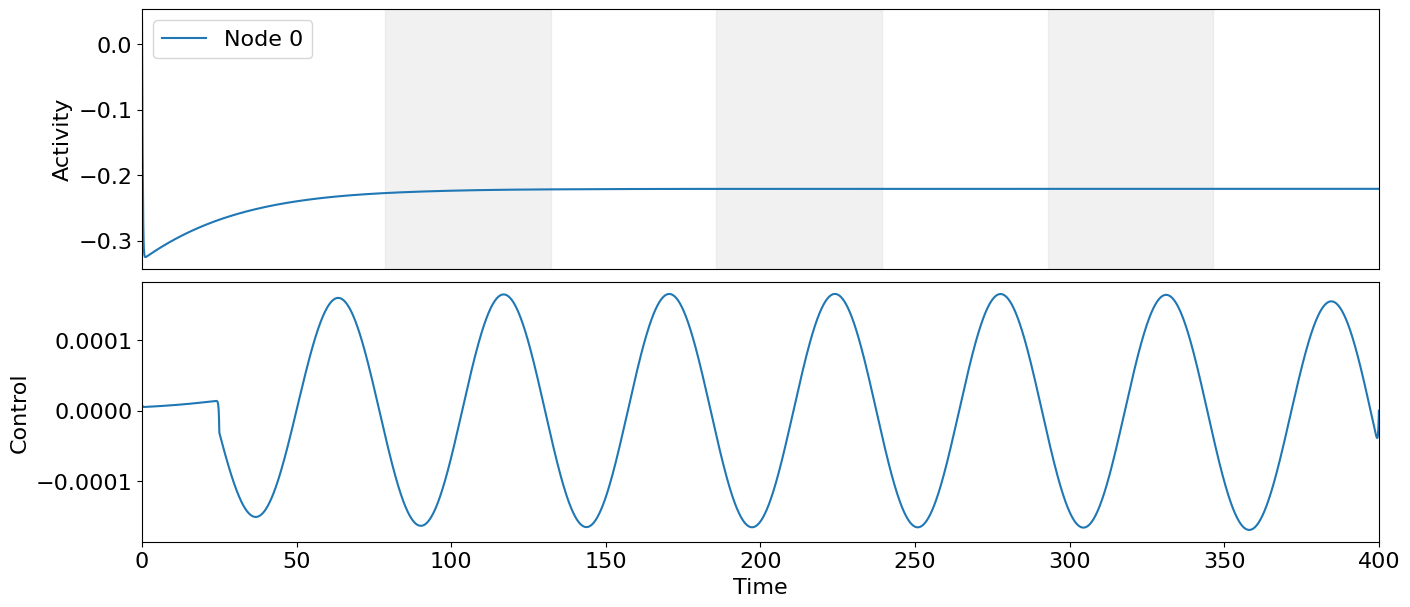

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0038528812130807872
Final cost : -0.0038528812130807872


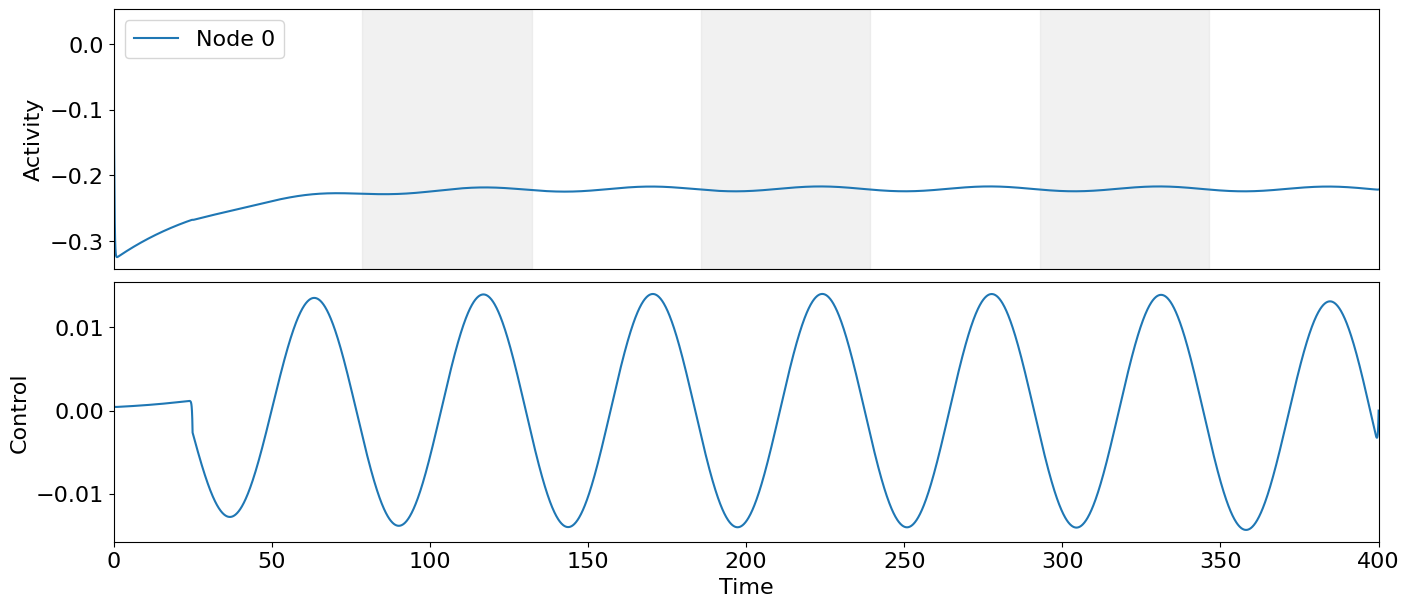

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.5991795816304837
Final cost : -0.5991795816304837


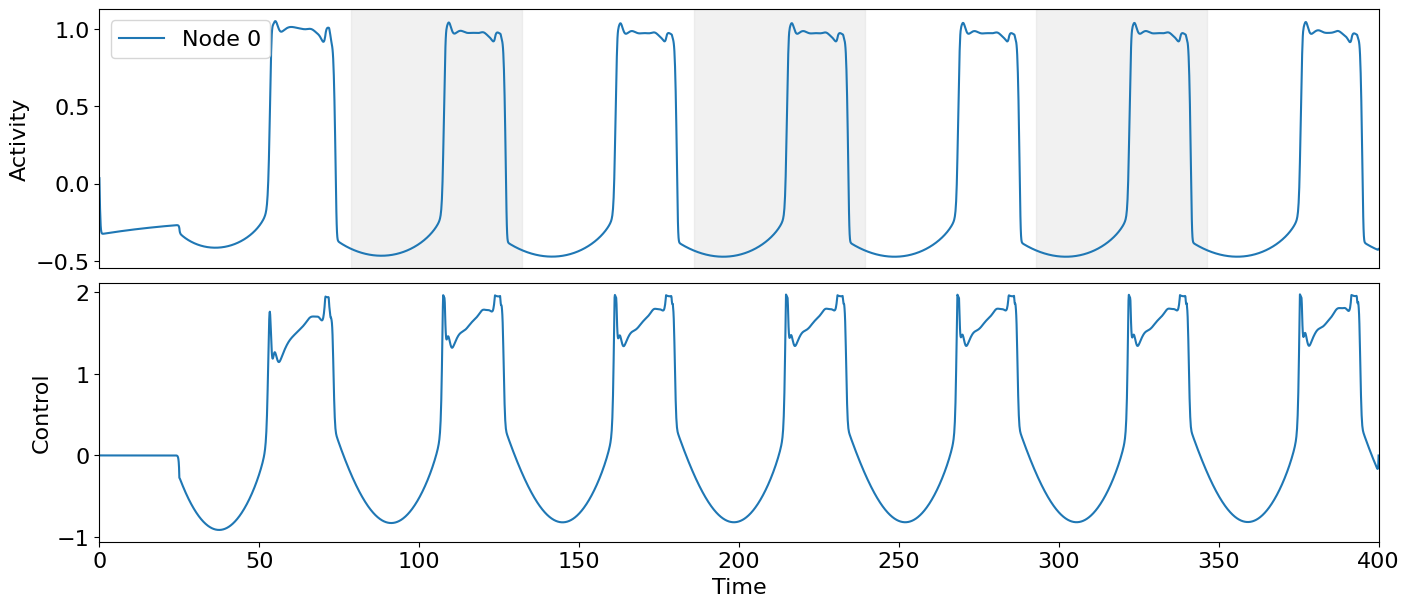

pind =  1
itar =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.005964404687313328
Final cost : -0.005964404687313328


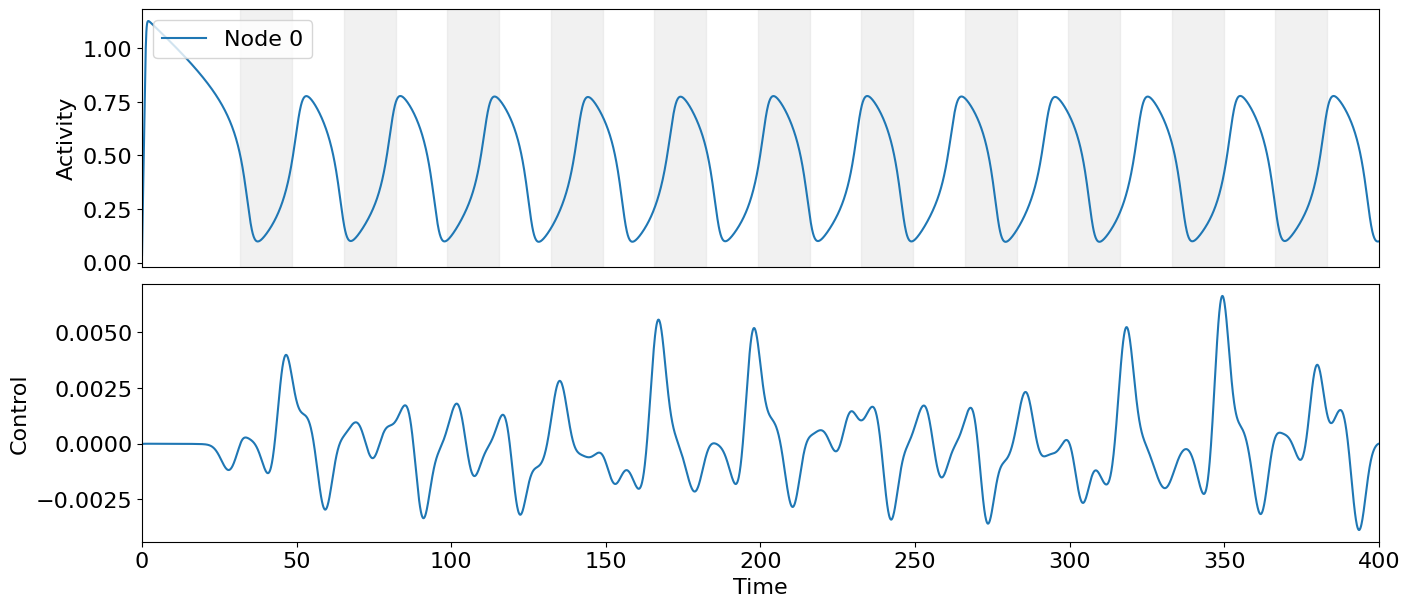

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.11367800590982308
Final cost : -0.11367800590982308


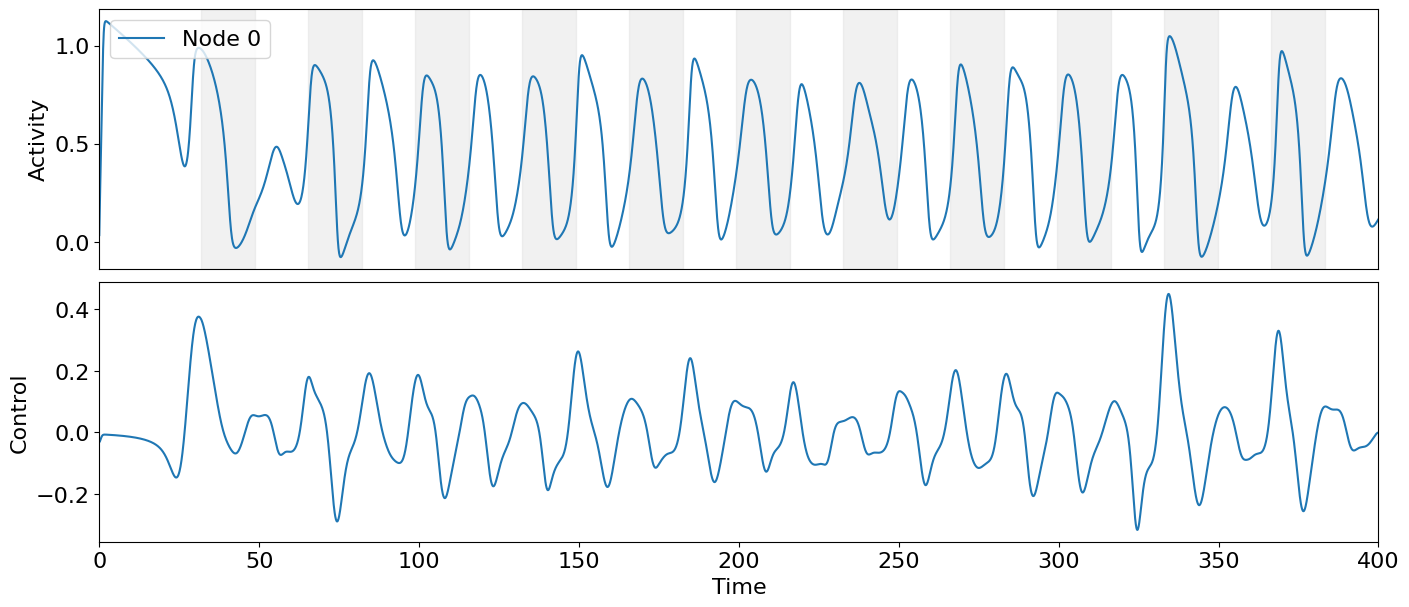

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.7664089805282179
Final cost : -0.7664089805282179


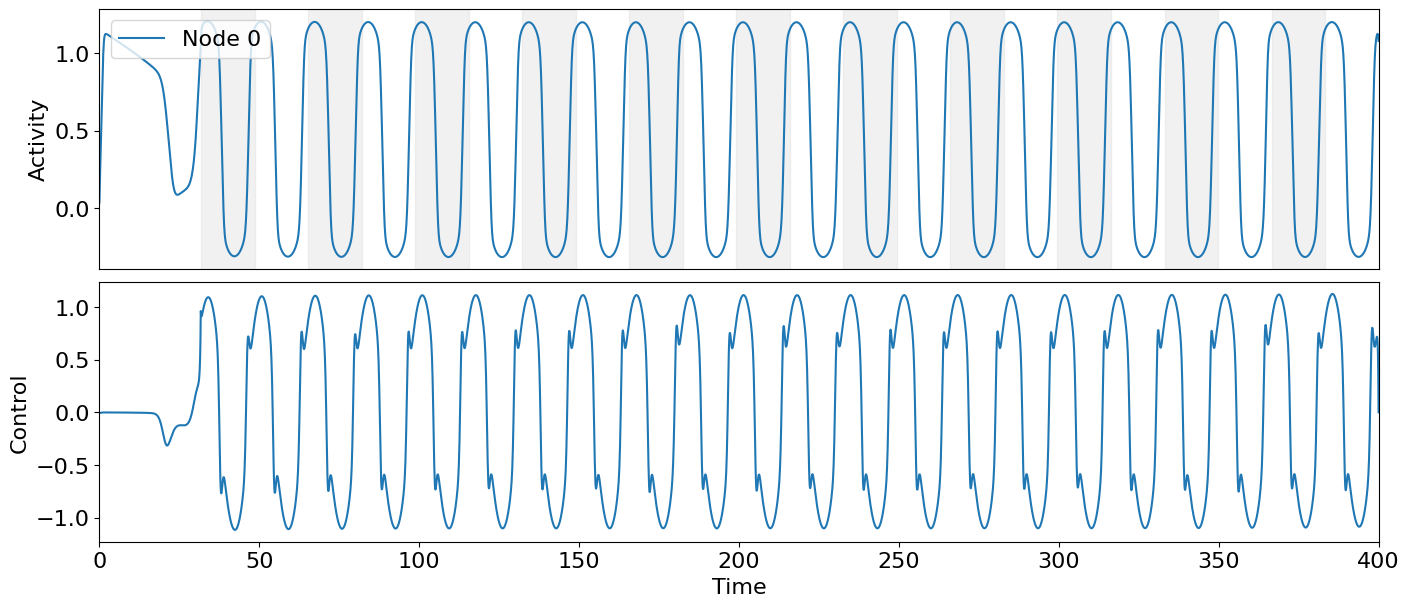

itar =  1
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.31271764511488137
Final cost : -0.31271764511488137


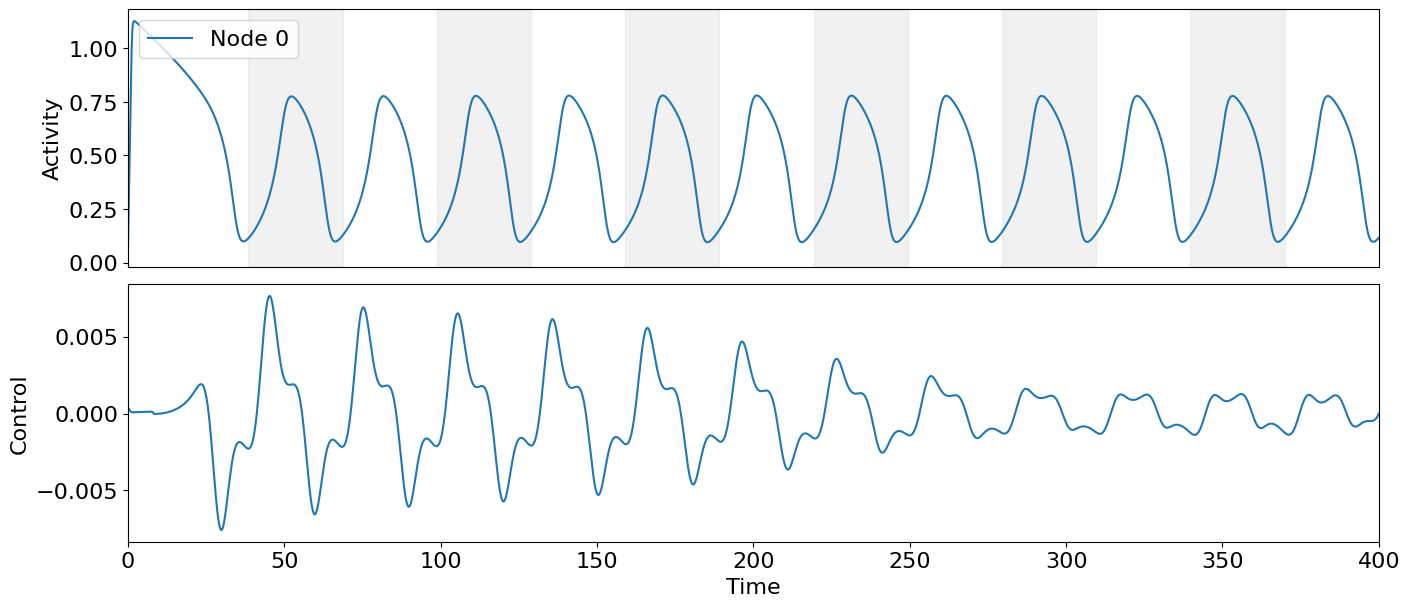

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.38459372877453213
Final cost : -0.38459372877453213


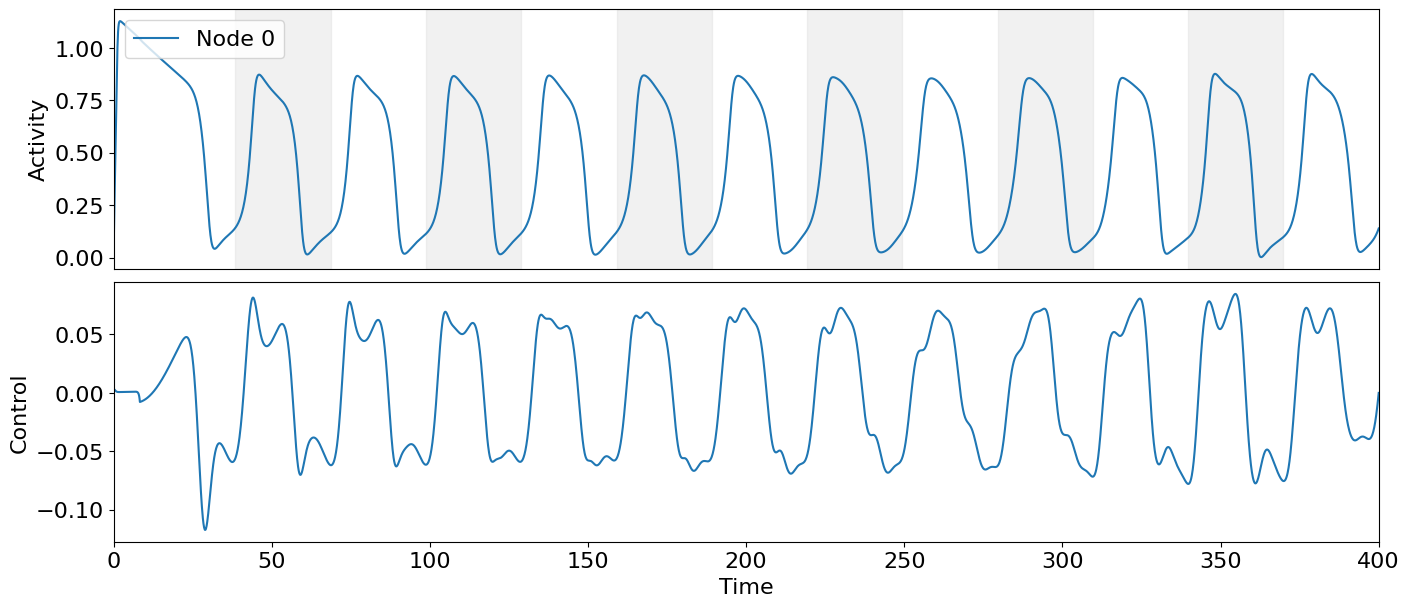

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.7644786967387392
Final cost : -0.7644786967387392


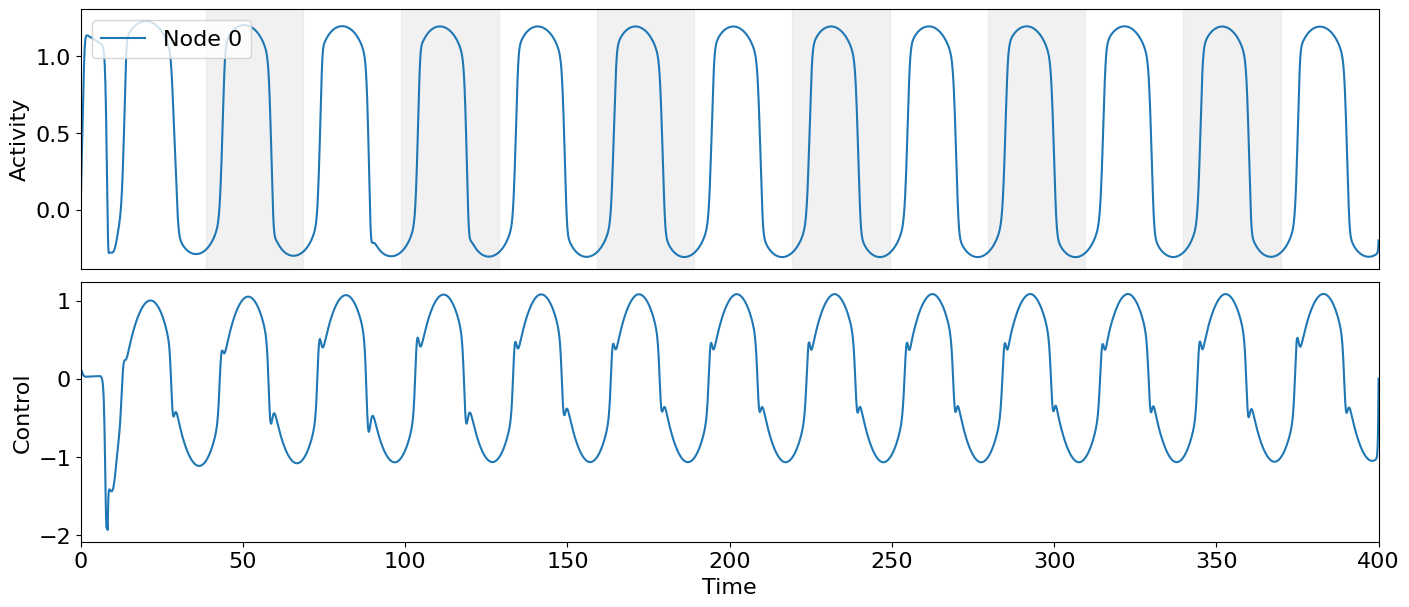

itar =  2
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.11375791783790681
Final cost : -0.11375791783790681


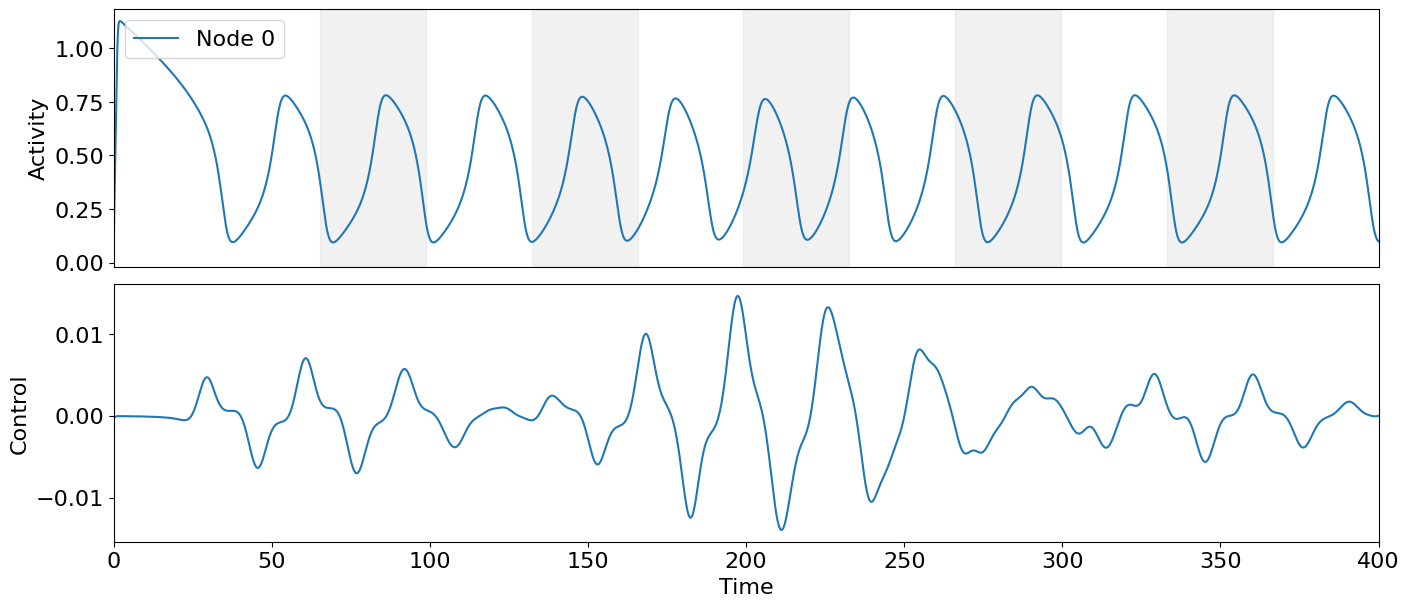

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2501197242696386
Final cost : -0.2501197242696386


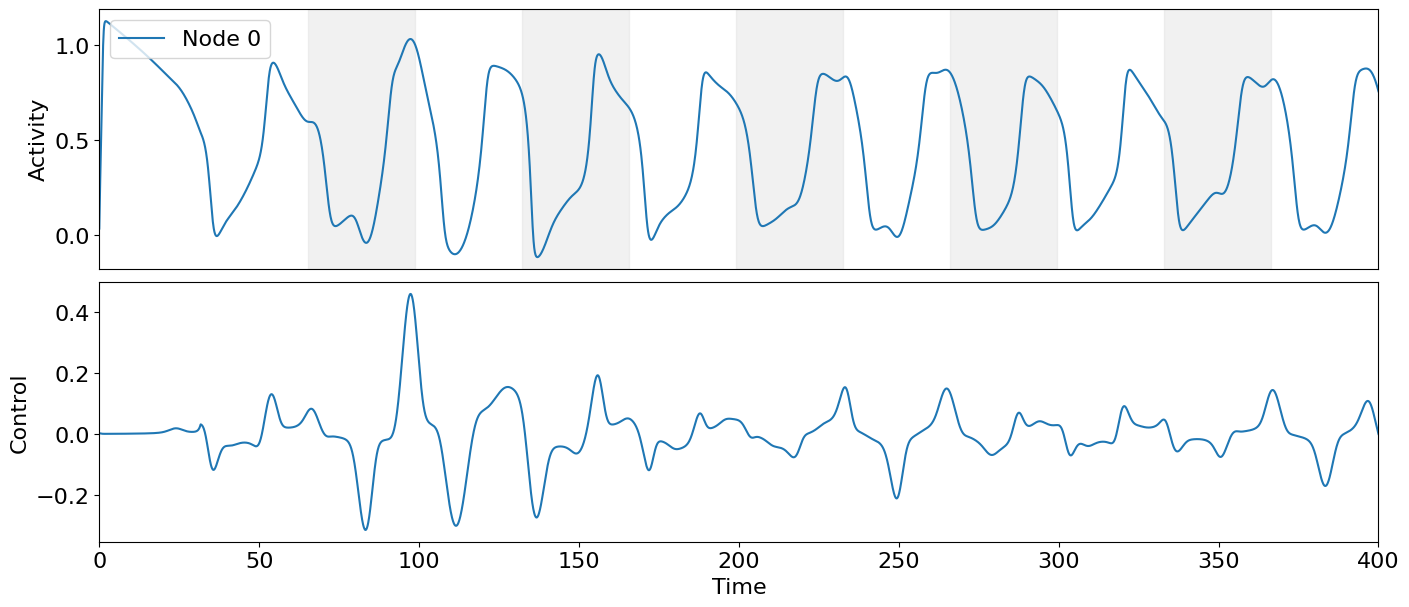

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.7715302957874572
Final cost : -0.7715302957874572


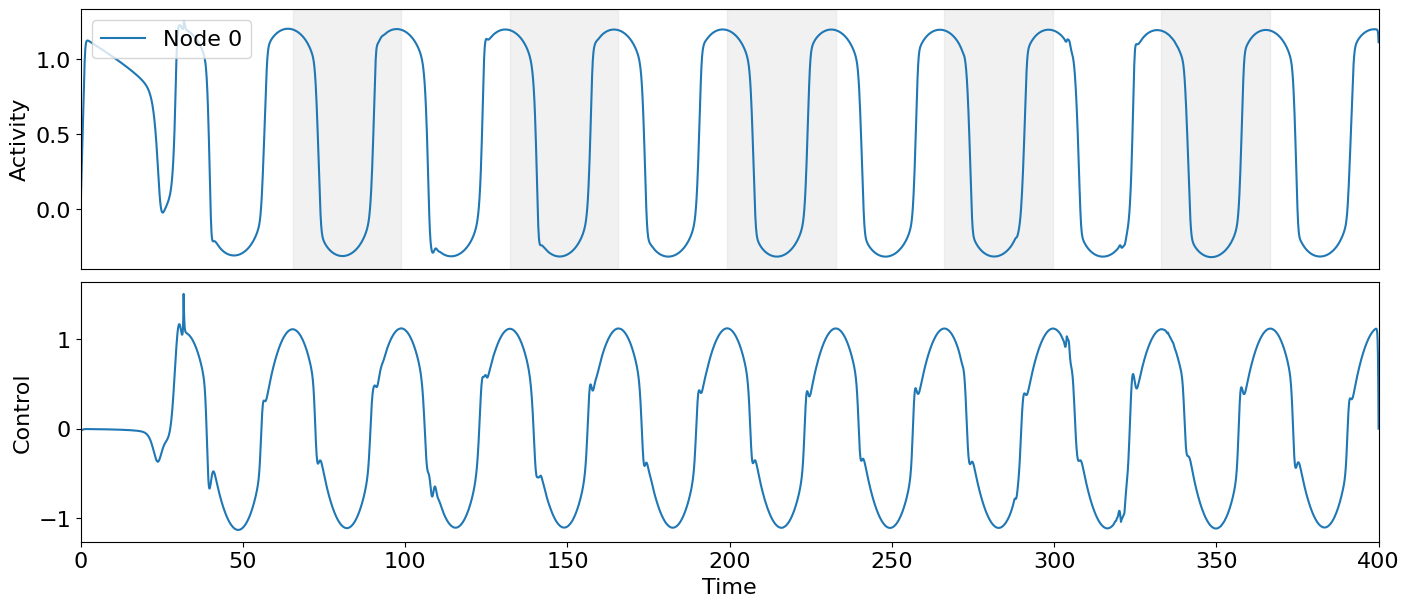

itar =  3
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.047955462006530475
Final cost : -0.047955462006530475


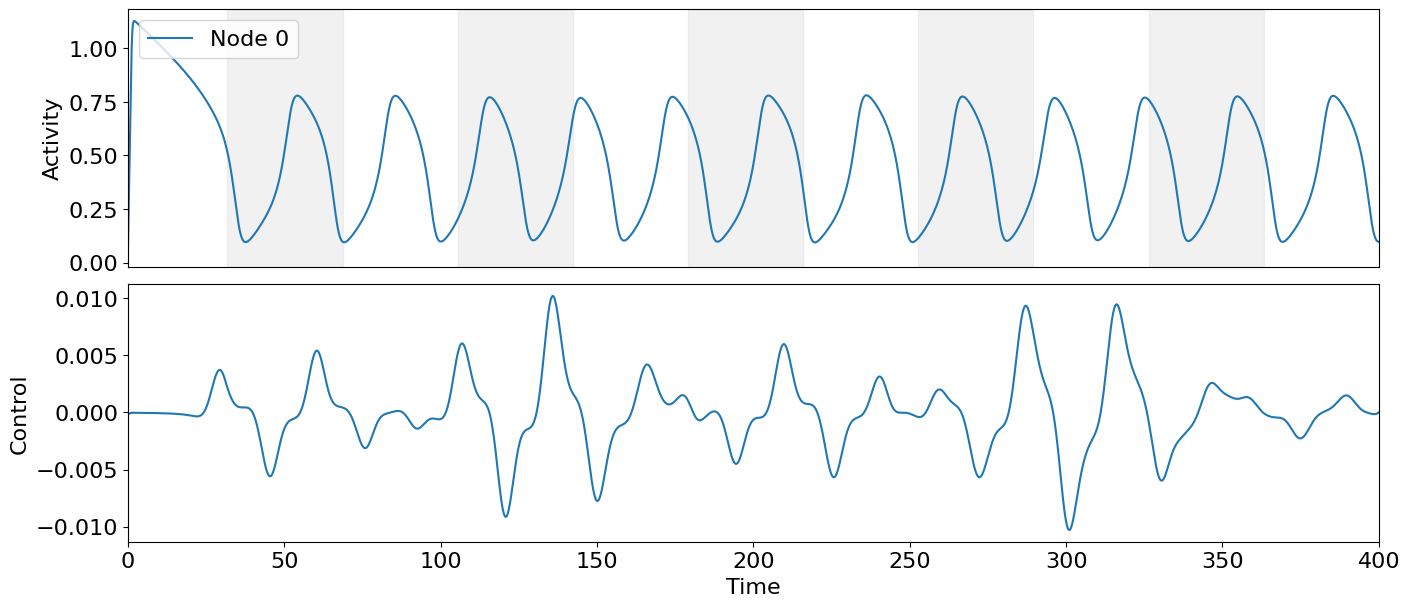

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.22482357898188343
Final cost : -0.22482357898188343


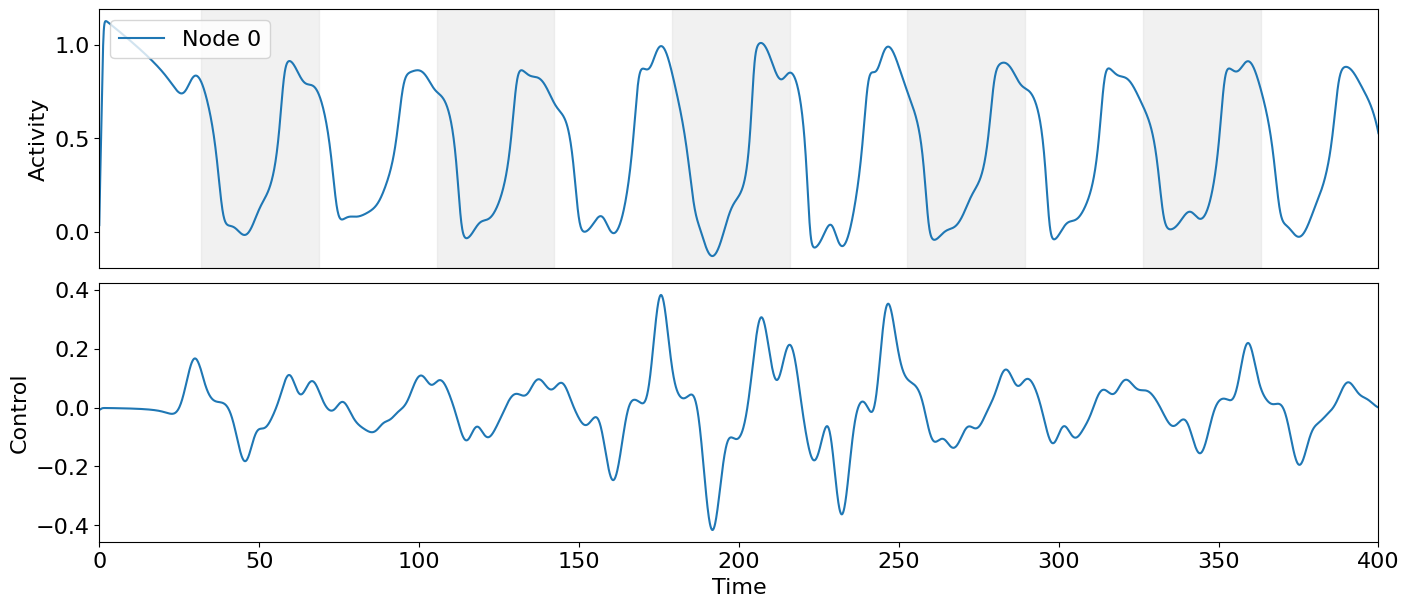

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.7721941050766458
Final cost : -0.7721941050766458


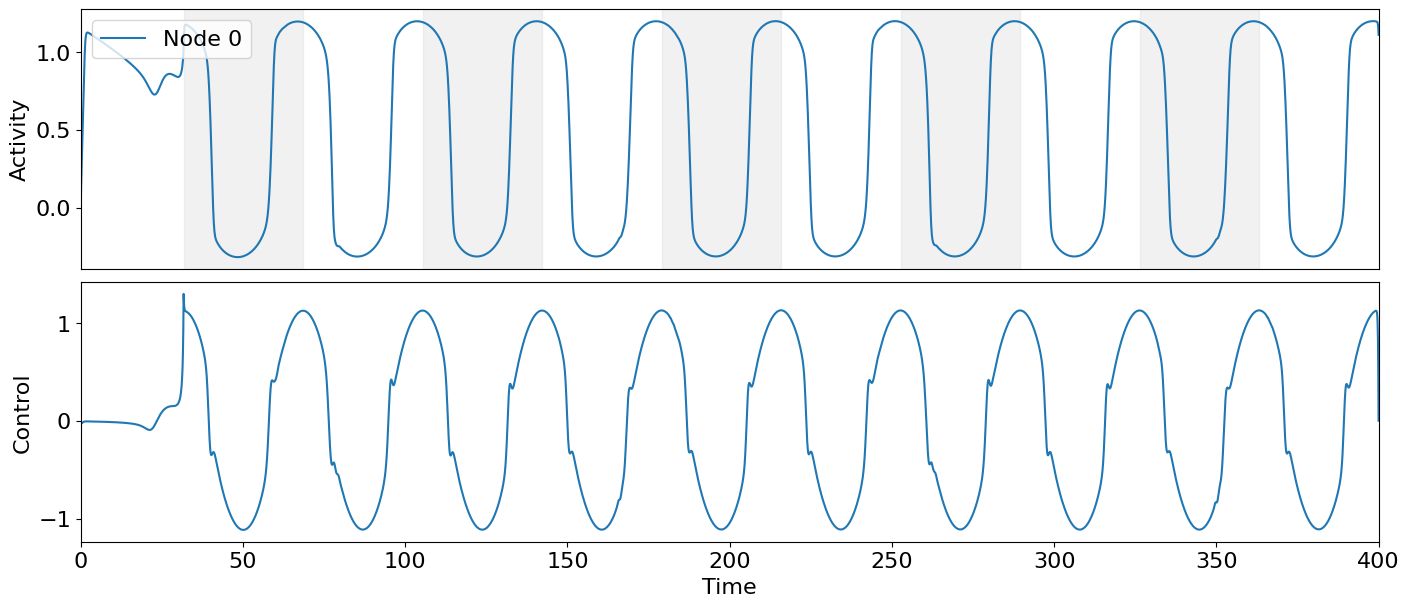

itar =  4
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.018983238742063594
Final cost : -0.018983238742063594


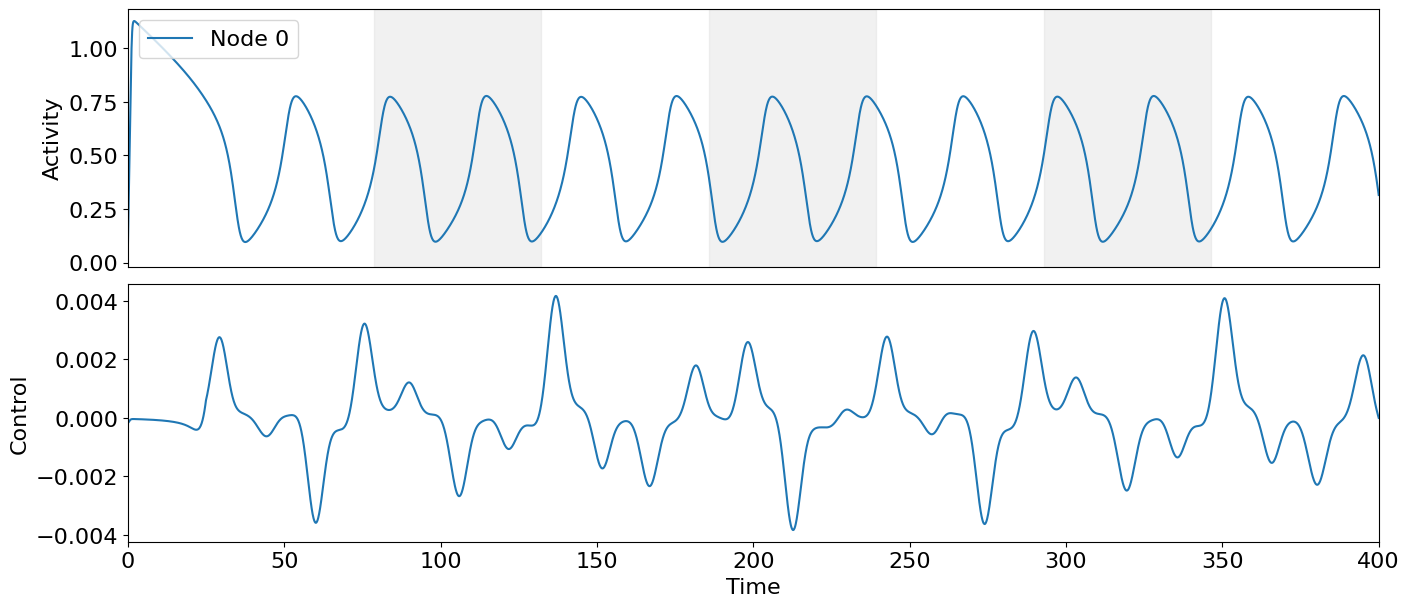

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2298623329311403
Final cost : -0.2298623329311403


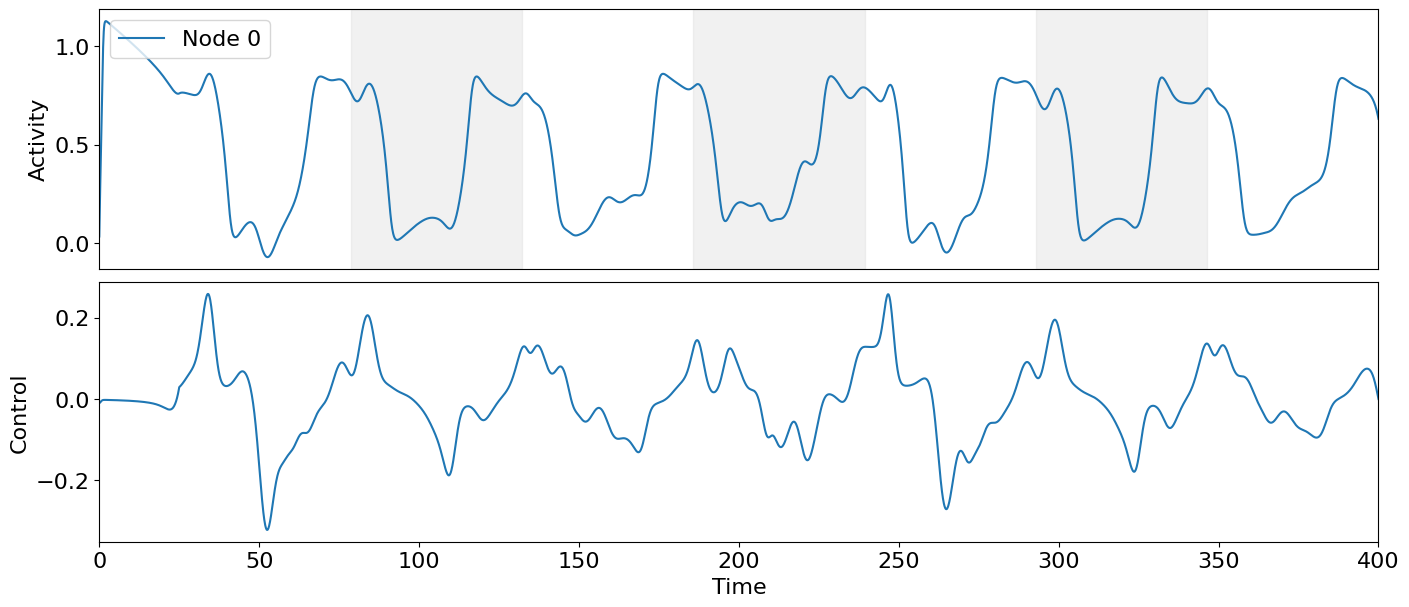

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.7600374289281773
Final cost : -0.7600374289281773


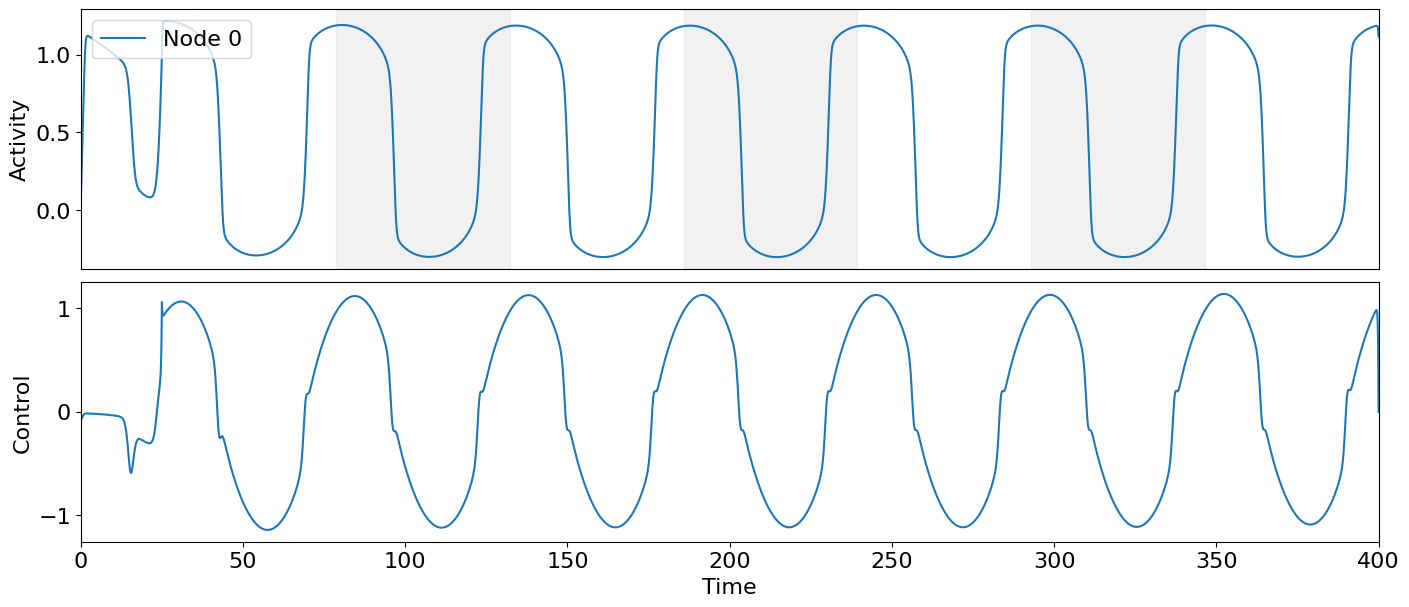

pind =  2
itar =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.002326933339074562
Final cost : -0.002326933339074562


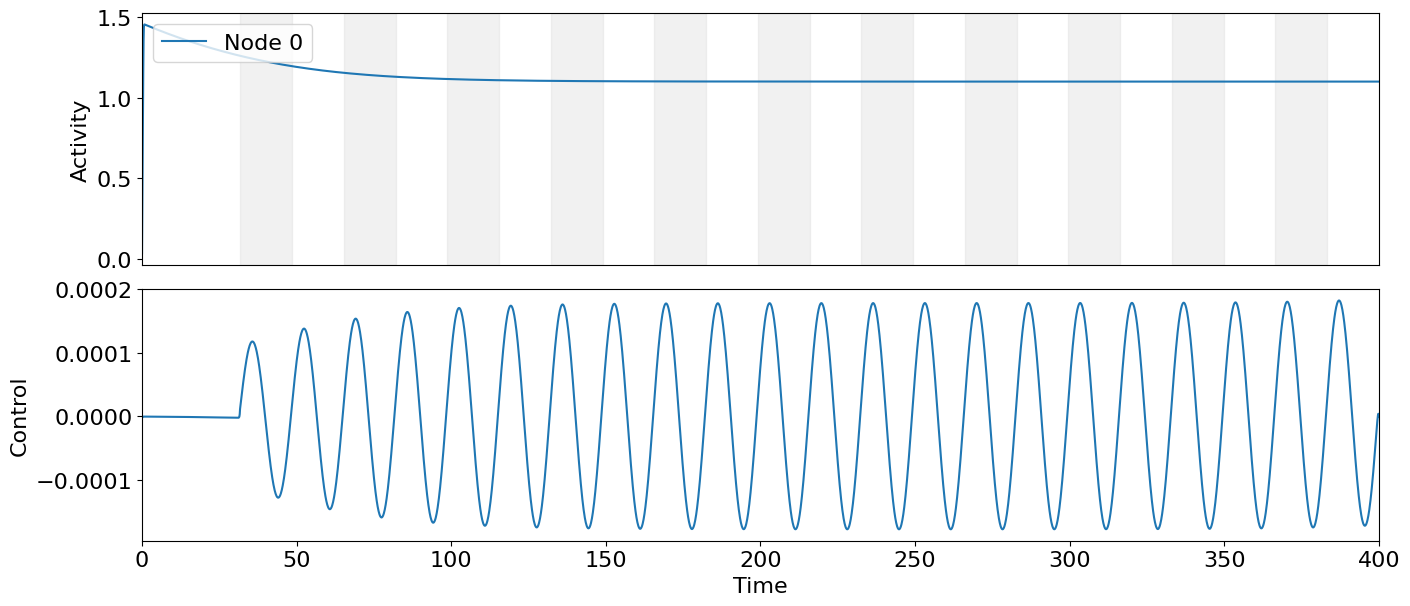

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.004276971432467689
Final cost : -0.004276971432467689


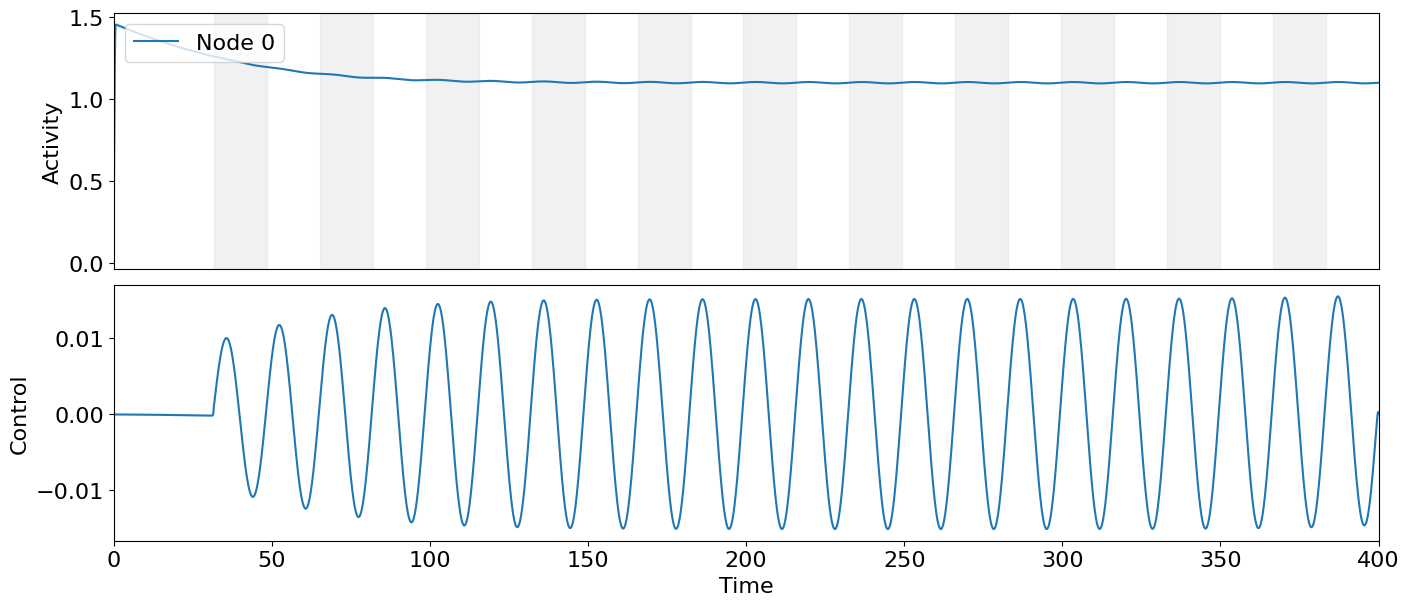

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.6152713566487201
Final cost : -0.6152713566487201


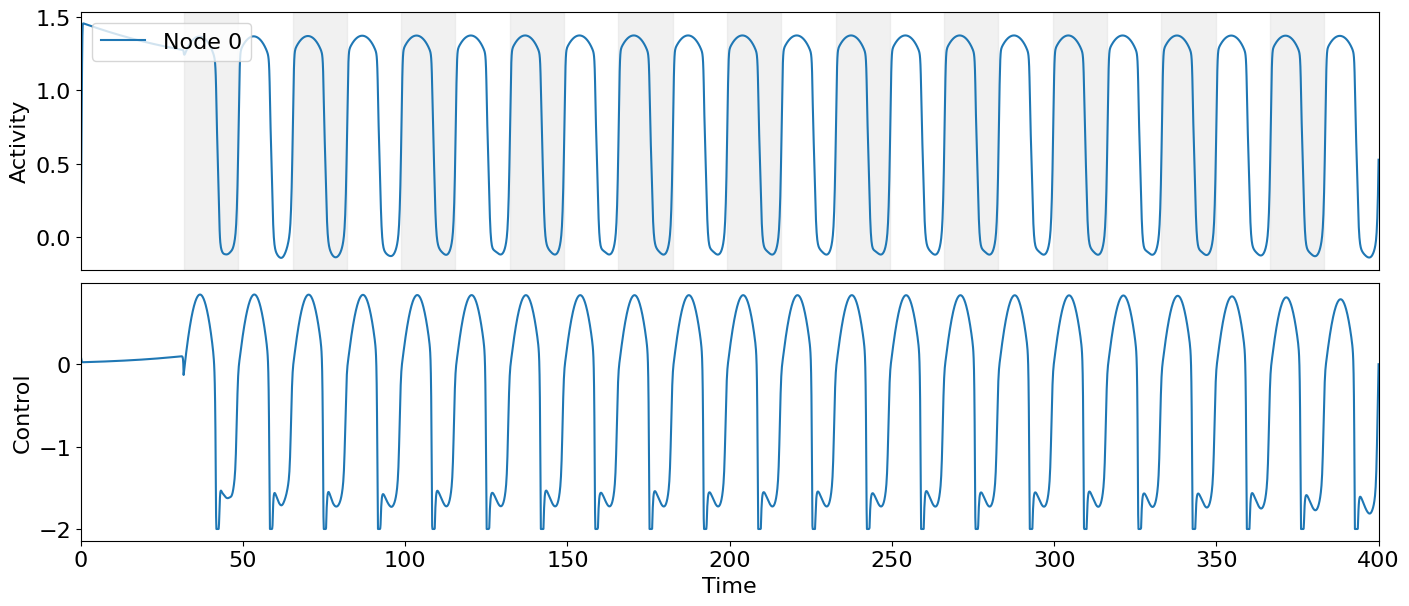

itar =  1
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0072816030342632895
Final cost : -0.0072816030342632895


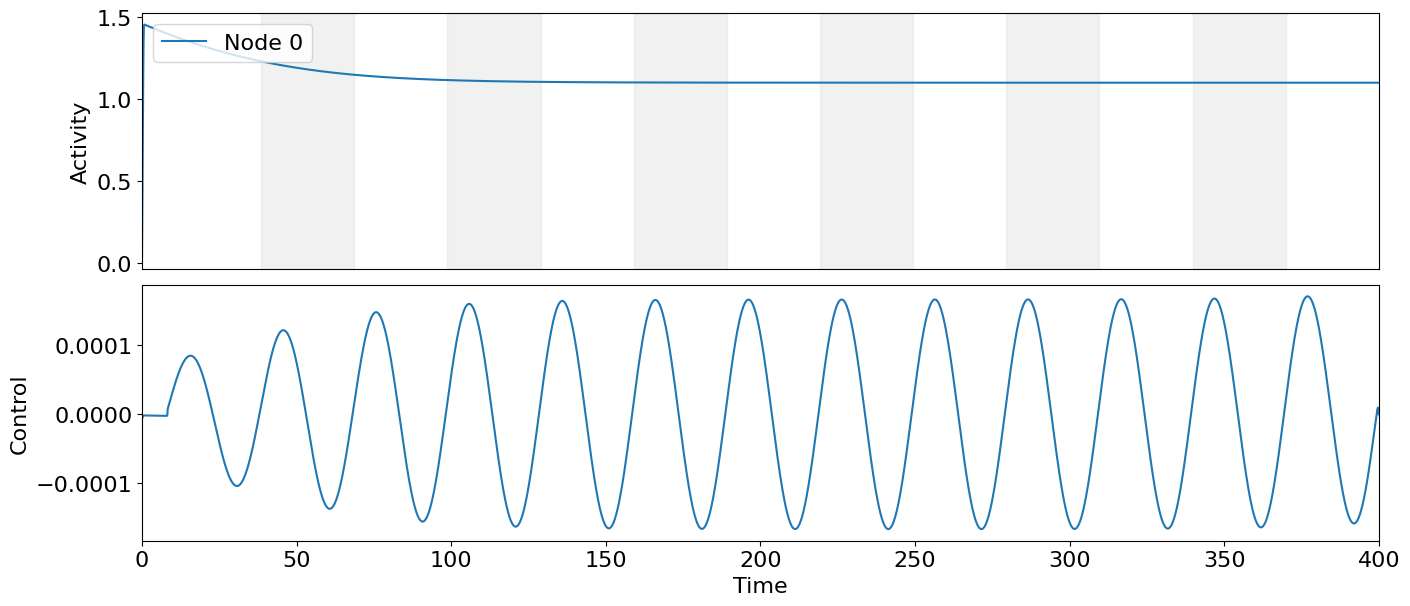

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.009021098037404302
Final cost : -0.009021098037404302


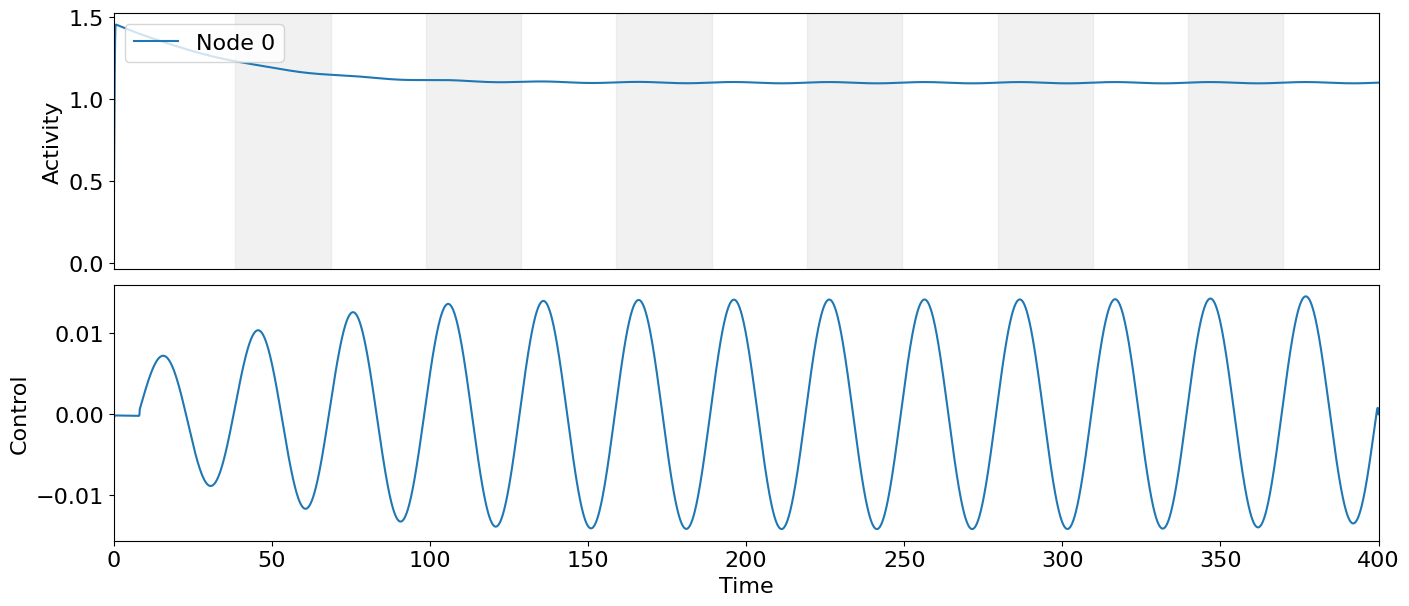

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.6016913626882302
Final cost : -0.6016913626882302


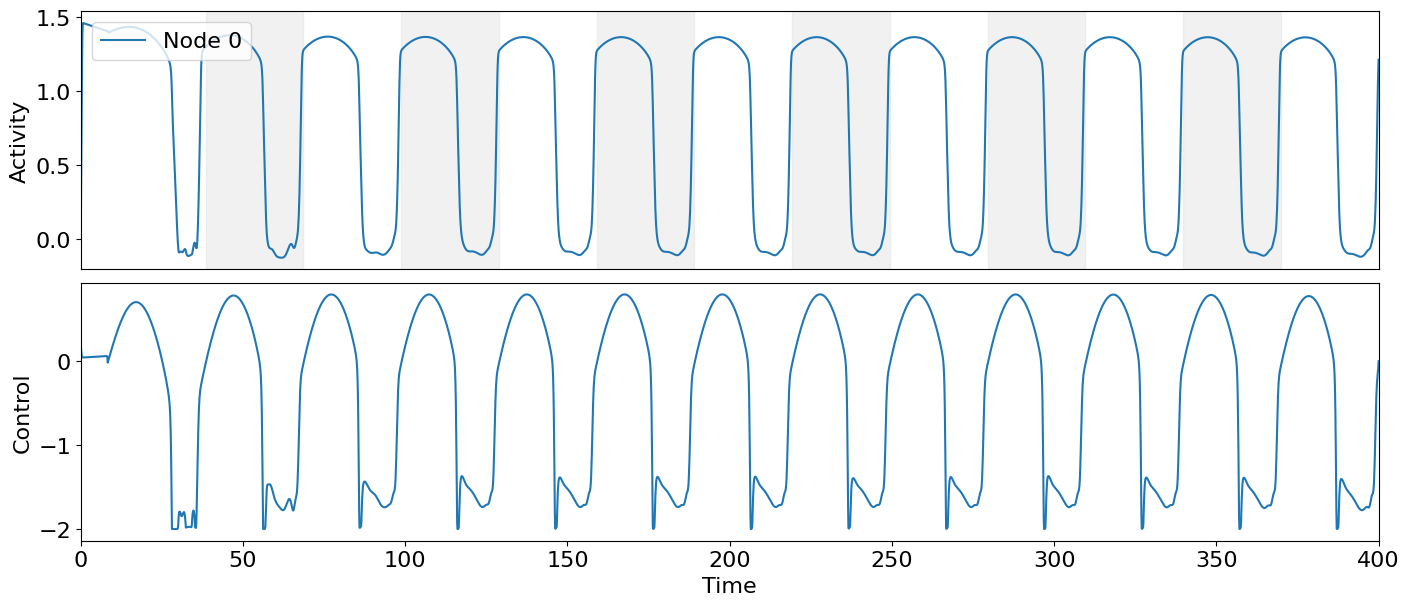

itar =  2
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.004612619533053787
Final cost : -0.004612619533053787


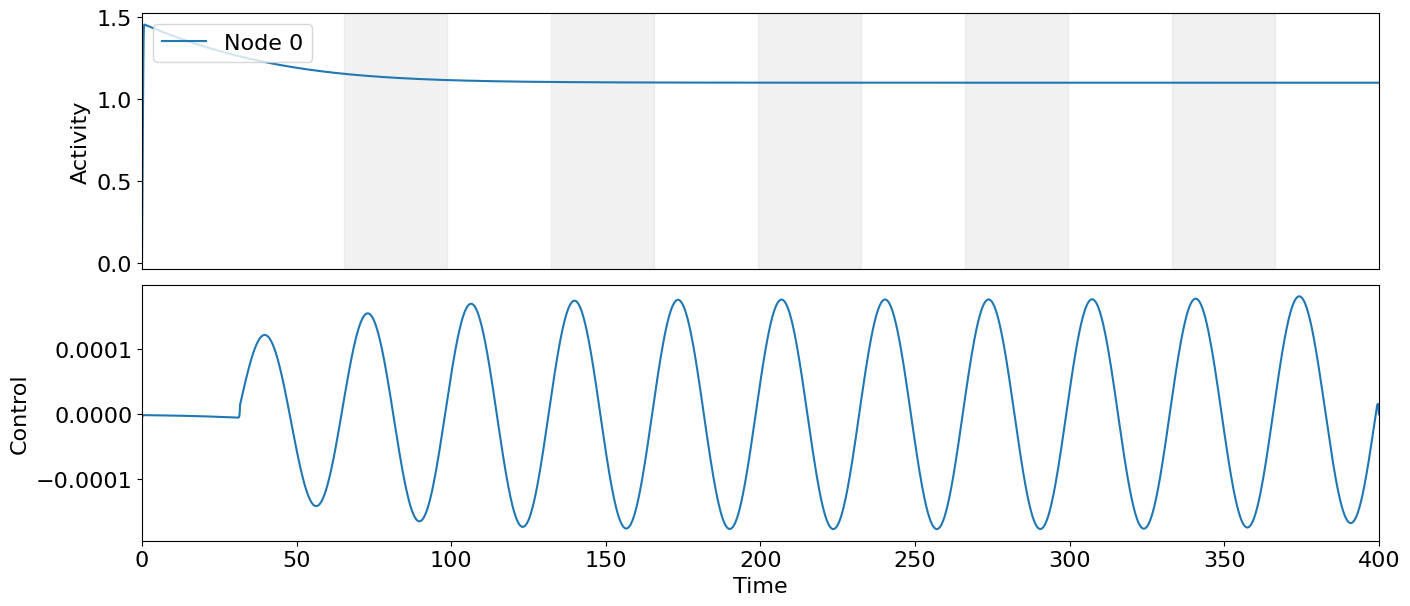

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.006531983232588152
Final cost : -0.006531983232588152


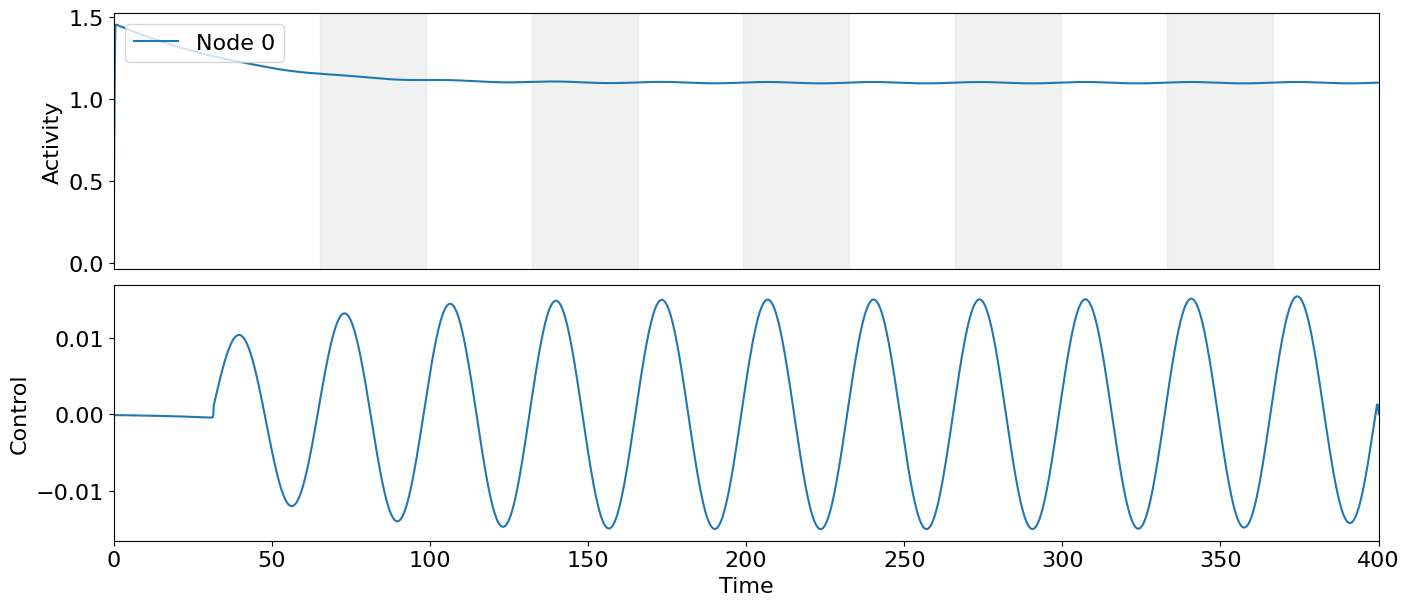

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.6283436652548374
Final cost : -0.6283436652548374


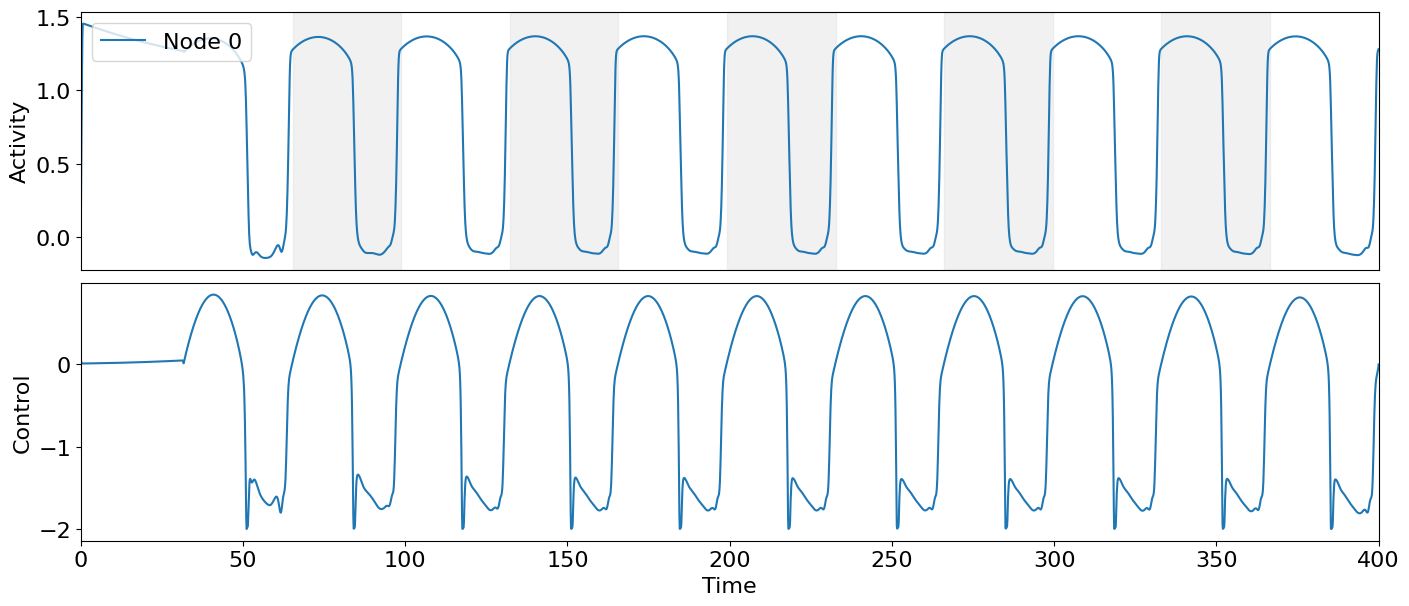

itar =  3
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.00506500462674848
Final cost : -0.00506500462674848


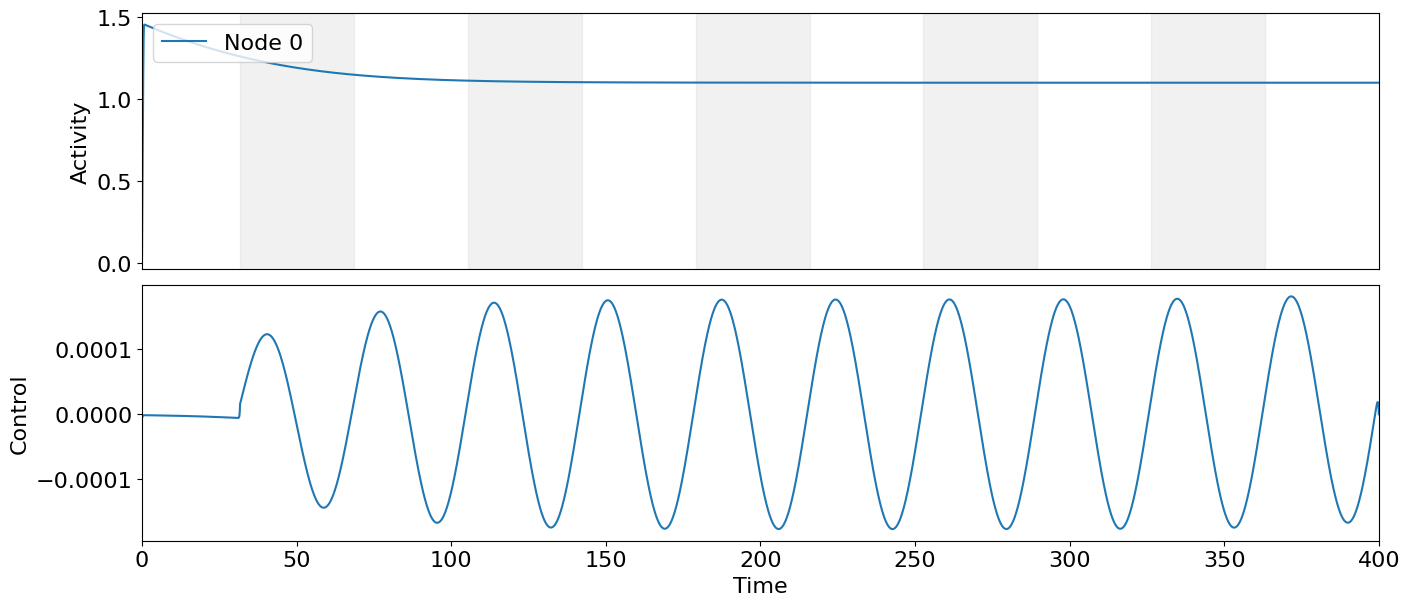

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.006974076663999013
Final cost : -0.006974076663999013


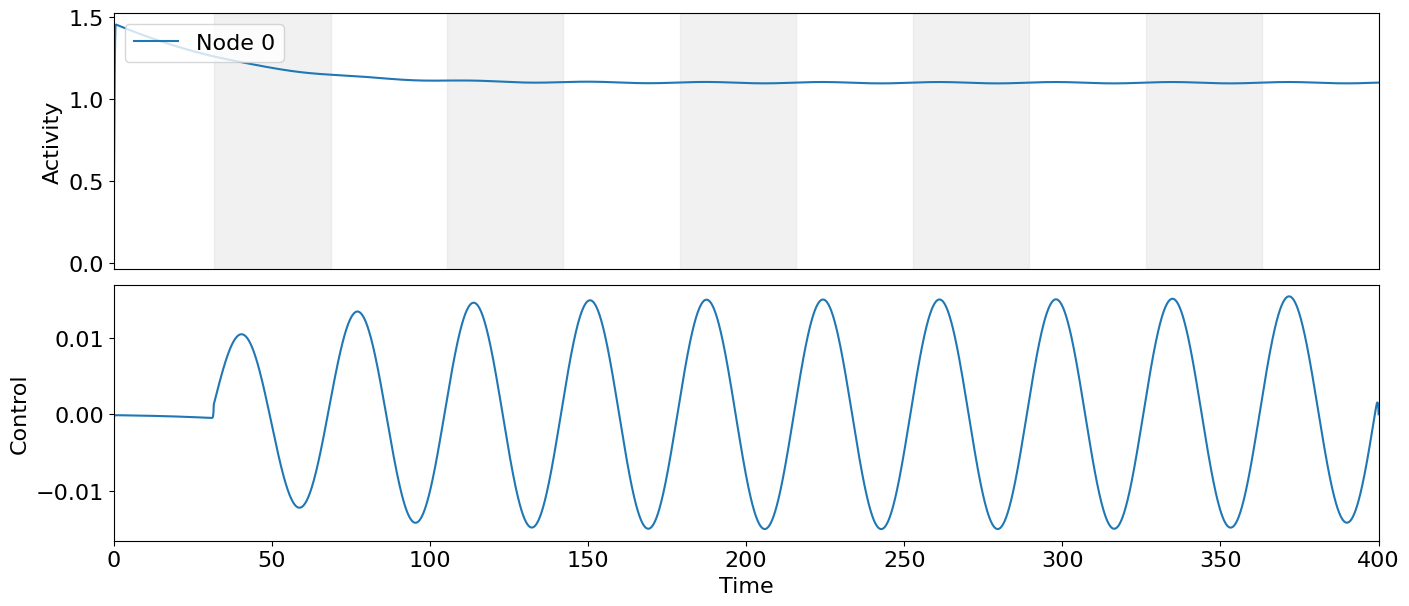

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.626676083530987
Final cost : -0.626676083530987


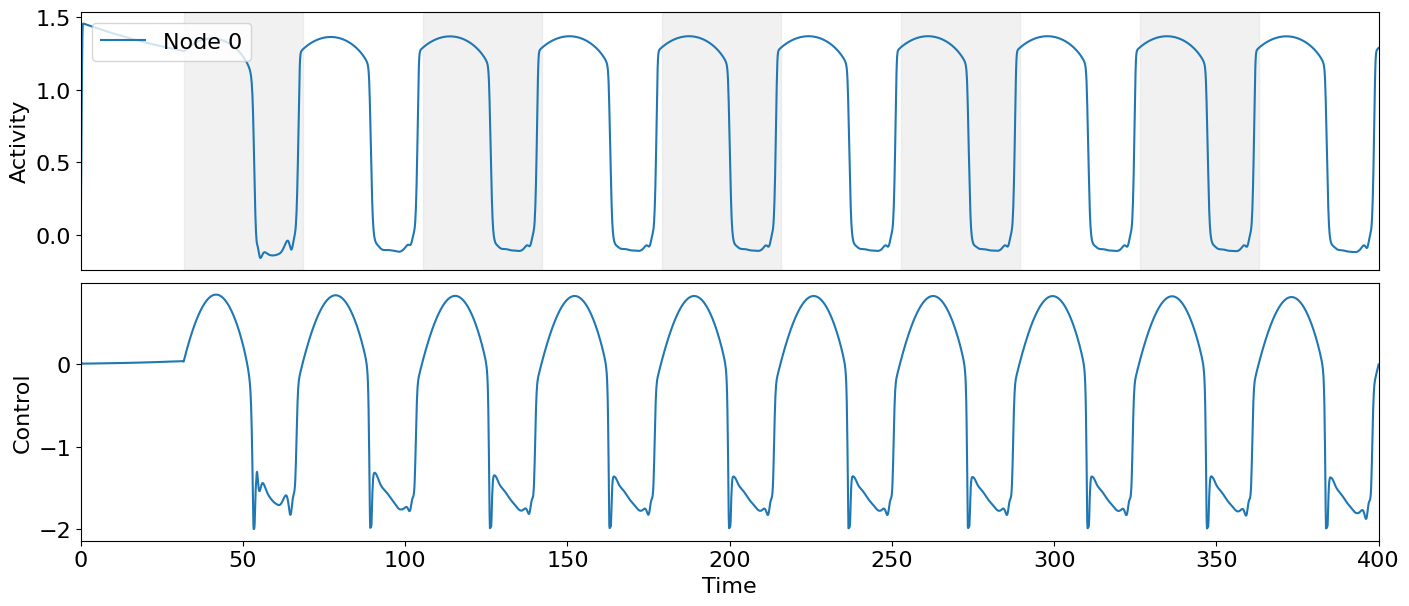

itar =  4
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.00868177524568112
Final cost : -0.00868177524568112


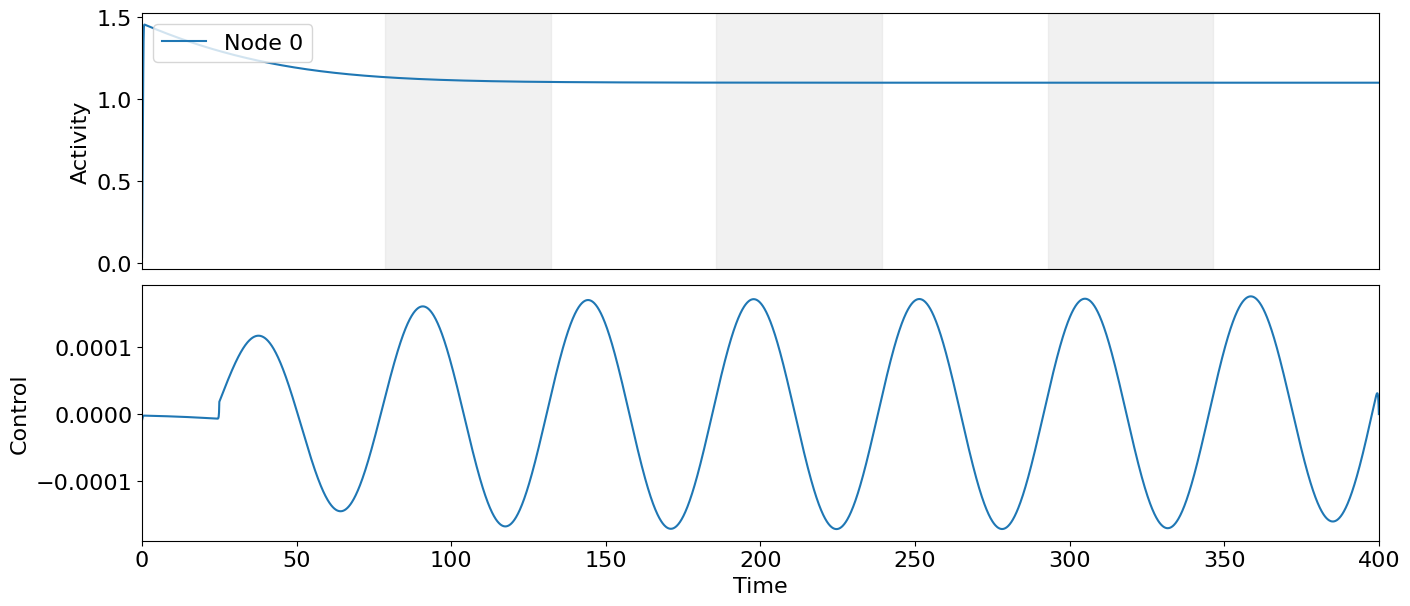

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.010474618117970503
Final cost : -0.010474618117970503


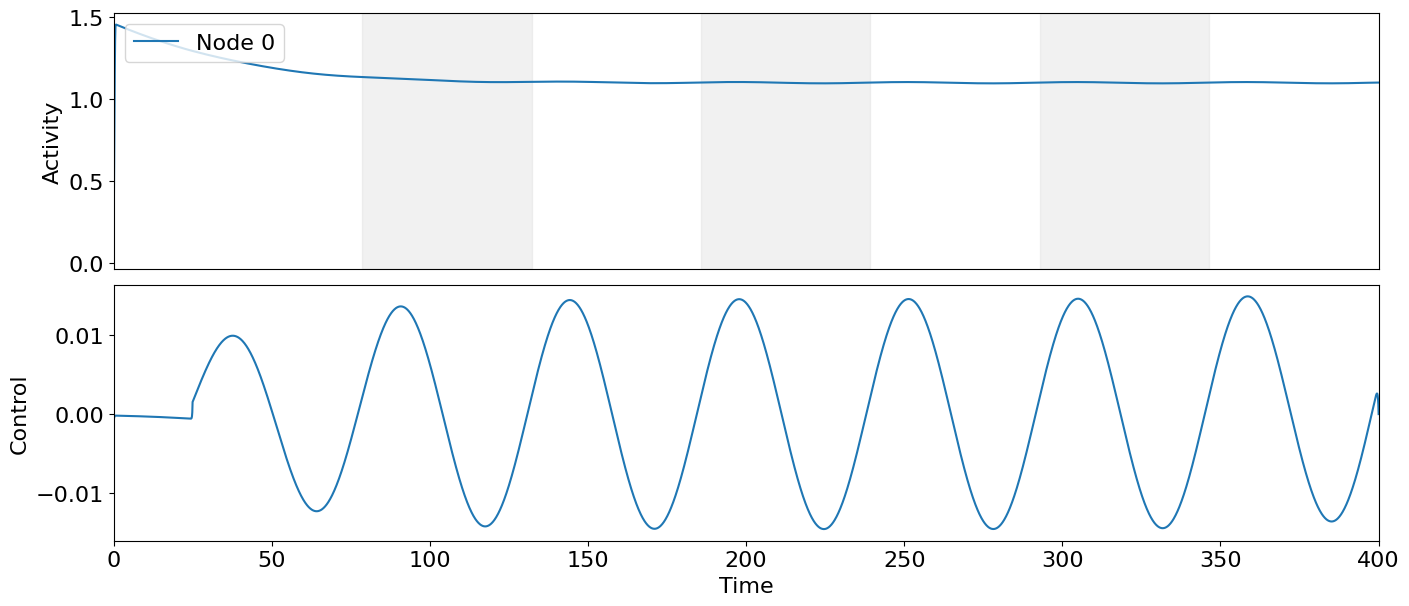

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.6051859275537708
Final cost : -0.6051859275537708


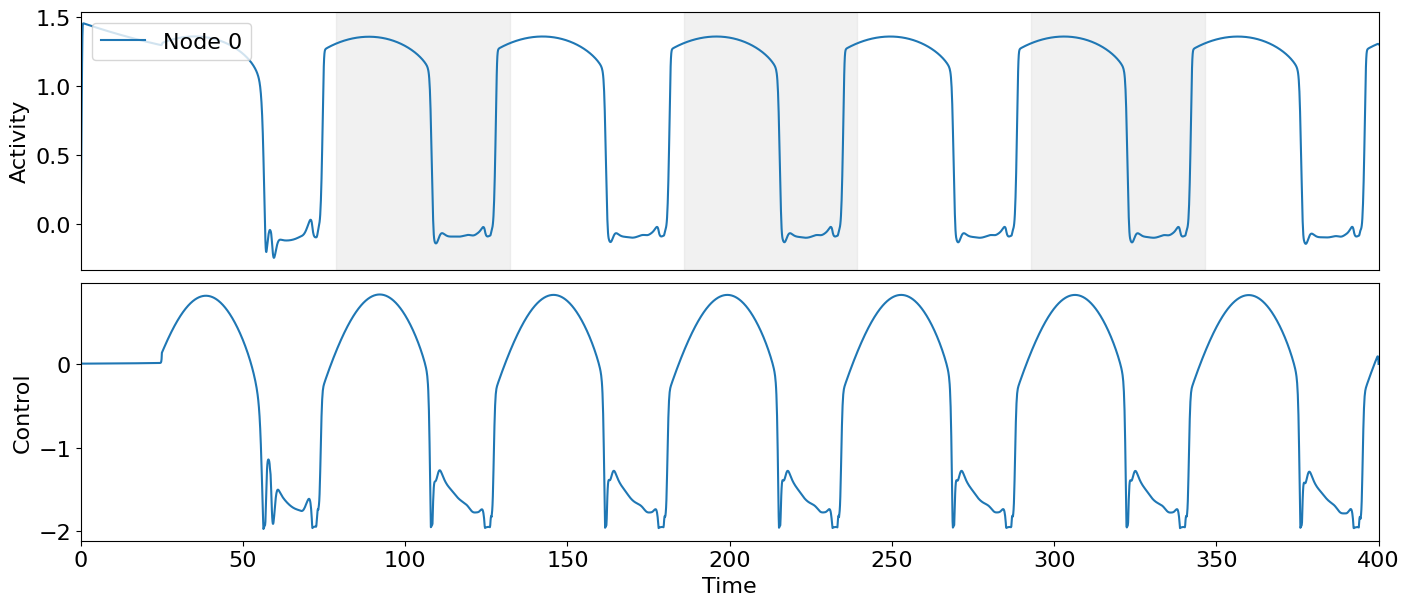

In [103]:
it = 0
pr = np.arange(0,101,10)
maxstr = 2.
nmaxdel = model.getMaxDelay()
init_control = zero_control.copy()
for pind in range(len(comp_points)):

    print("pind = ", pind)

    p = comp_points[pind]
    
    testd = 1000.
    model.params.duration = testd
    test_input = ZeroInput().generate_input(duration=testd+model.params.dt, dt=model.params.dt)
    model.params["x_ext"] = test_input
    model.params["y_ext"] = test_input
    model.params["x_ou_mean"] = p[0]
    model.params["y_ou_mean"] = p[1]
    model.run()

    einit = np.zeros((N, nmaxdel+1))
    iinit = np.zeros((N, nmaxdel+1))


    for n in range(N):
        einit[n,:] = model.x[n,-1]
        iinit[n,:] = model.y[n,-1]

    model.params.duration = duration

    model.params["x_ext"] = zero_control[:,0,:]
    model.params["y_ext"] = zero_control[:,0,:]

    model.params["x_init"] = einit
    model.params["y_init"] = iinit

    model.run()

    for itar in range(len(target_array)):

        print("itar = ", itar)

        target_period = target_array[itar]
        i00 = 0
        int0 = np.around( (duration - i00 * target_period) / model.params.dt, 0).astype(int)     
        while int0 > 350:
            i00 += 1
            int0 = np.around( (duration - i00 * target_period) / model.params.dt, 0).astype(int)

        for iw in range(len(w2_array)):

            print("iw = ", iw)
            
            w2 = w2_array[iw]

            model_controlled = oc_fhn.OcFhn(model, target_period, print_array=pr, cost_interval=(int0,None), cost_matrix=costmat, control_matrix = controlmat)
            model_controlled.maximum_control_strength = maxstr
            model_controlled.weights["w_p"] = 0.
            model_controlled.weights["w_2"] = w2
            model_controlled.weights["w_f"] = 1.

            if type(results["controls"][pind][itar][iw]) != type(None):
                model_controlled.control = results["controls"][pind][itar][iw].copy()
                model_controlled.update_input()

            model_controlled.optimize(it)
            results["controls"][pind][itar][iw] = model_controlled.control.copy()

            timings, periods = getperiods(model_controlled.get_xs(), proms[iw])
            results["timings"][pind][itar][iw] = timings
            results["periods"][pind][itar][iw] = periods

            fname = str(pind) + "_" + str(itar) + "_"  + str(iw) + ".png"

            plot_oc_nw(N, duration, dt, model_controlled.get_xs(), target_period,  model_controlled.control, filename= os.path.join(dir, fname))


In [104]:
with open('osc_1n.pickle', 'wb') as f:
    pickle.dump(results, f)

In [ ]:
with open('osc_1n.pickle', 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

results = res_read.copy()

dict_keys(['controls', 'periods', 'timings'])


In [105]:
xl = ["Down F", "Osc F", "Up F"]

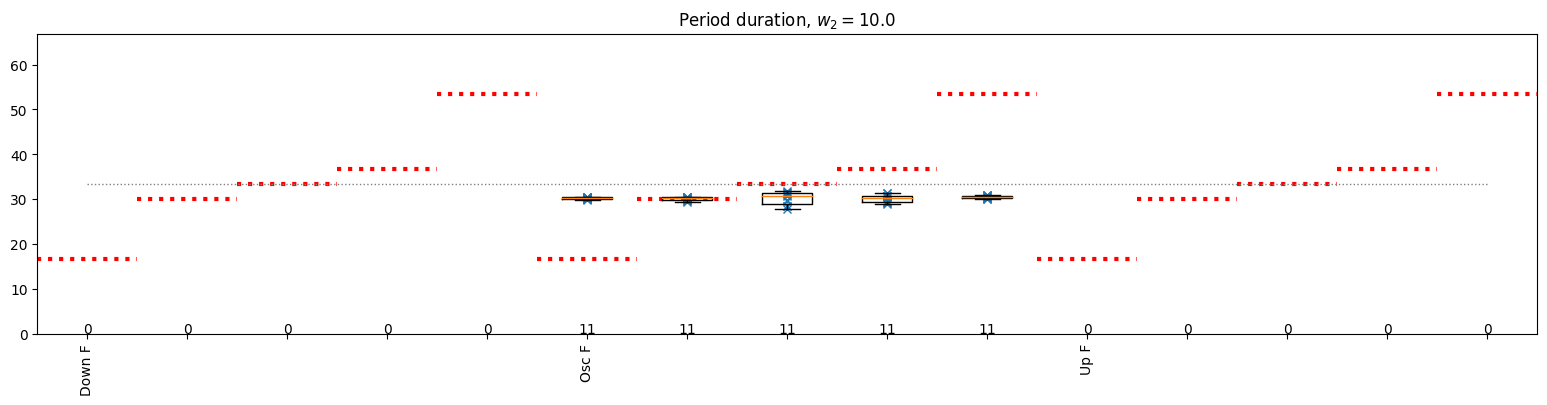

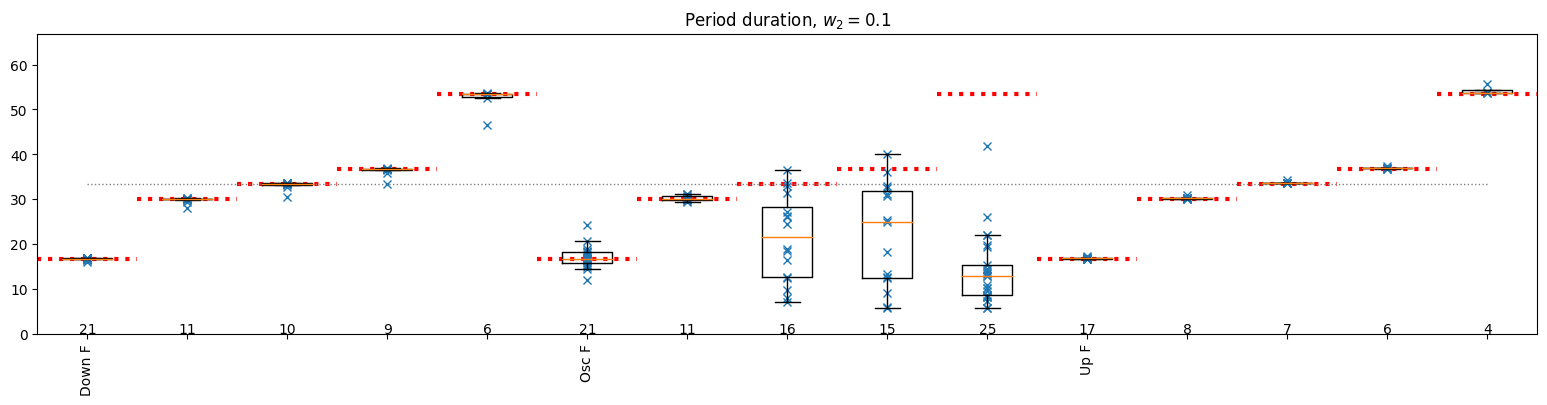

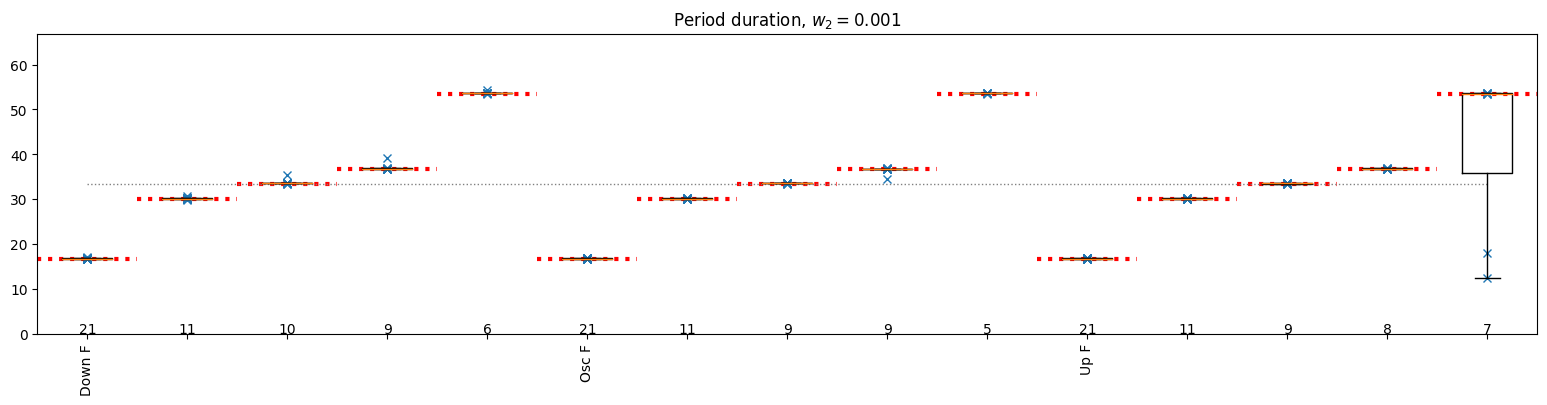

In [107]:
for iw in range(len(w2_array)):
    ydata = []
    xlabels = []
    fig = plt.figure(figsize =(15, 3))
    ax = fig.add_axes([0, 0, 1, 1])

    xpos = 0

    for pind in range(len(comp_points)):
        for itar in range(len(target_array)):

            target_period = target_array[itar]
            #xpos = 15*imet + 5*pind + itar

            if itar != 0:
                xlabels.append("")
            else:
                xlabels.append(xl[pind])

            data = results["periods"][pind][itar][iw]
            ydata_ = []
            
            if data is None:
                ydata.append(ydata_)
                continue

            n_datapoints = 0

            for n in range(N):
                n_datapoints += len(data[n])
                
                if len(data[n]) != 0:
                    for dpoint in data[n]:
                        ax.plot(xpos+1, dpoint, marker="x", color=colors[n])
                        ydata_.append(dpoint)

            ydata.append(ydata_)

            ax.text(xpos+1, 1, str(n_datapoints), horizontalalignment='center', verticalalignment='center')
            ax.hlines(target_period, xpos+0.5, xpos+1.5, linestyle=":", color="red", linewidth =3)

            xpos += 1


    ax.boxplot(ydata, showfliers=False)
    ax.plot()
    ax.hlines(period, 1., len(xlabels), linestyle=":", color="grey",linewidth = 1)
    ax.set_xticklabels(xlabels, rotation=90)
    ax.set_ylim(0., 2.*period)
    ax.set_title(r"Period duration, $w_2 = $" + "{}".format(w2_array[iw]))
    plt.show()
    fig.savefig(os.path.join(dir, "periods_" + str(iw) + ".png"), bbox_inches='tight')